(53, 63, 52)
(53, 63, 52)
imgpath_1
C:\Users\Tony\Downloads\Pipeline sub-03\con_0004.nii
imgpath_2
C:\Users\Tony\Downloads\SPM run-02_sub-03\con_0004.nii
data1
0.0
data2
0.0


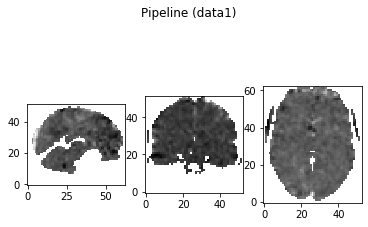

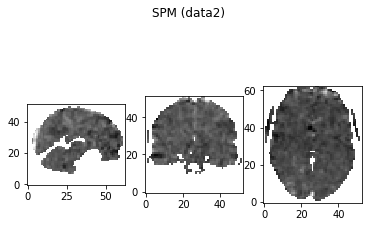

In [4]:
import os
import nibabel as nib
from nibabel.testing import data_path
import matplotlib.pyplot
import numpy 

result = []
result1 = []
result2 = []
#image paths
imgpath_1 = os.path.abspath("C:/Users/Tony/Downloads/Pipeline sub-03/con_0004.nii")
imgpath_2 = os.path.abspath("C:/Users/Tony/Downloads/SPM run-02_sub-03/con_0004.nii")
#image loads
img1 = nib.load(imgpath_1)
img2 = nib.load(imgpath_2)
#die bilddaten in arrays
data1 = img1.get_fdata()
data2 = img2.get_fdata()
diffdata = data1
print(data1.shape)
print(data2.shape)

#zeigt zentralslices beider bilder
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = data1[26, :, :]
slice_1 = data1[:, 31, :]
slice_2 = data1[:, :, 26]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Pipeline (data1)")  # doctest: +SKIP

slice_3 = data2[26, :, :]
slice_4 = data2[:, 31, :]
slice_5 = data2[:, :, 26]
show_slices([slice_3, slice_4, slice_5])
plt.suptitle("SPM (data2)")  # doctest: +SKIP

#entfernt die nans und packt die 3d array daten in einen 1d array
for i in range(0,len(data1)):
    for ii in range(0,len(data1[0])):
        for iii in range(0,len(data1[0][0])):
            if numpy.isnan(data1[i][ii][iii]) == True:
                data1[i][ii][iii] = 0
            result1.append(data1[i][ii][iii])
            
for i in range(0,len(data2)):
    for ii in range(0,len(data2[0])):
        for iii in range(0,len(data2[0][0])):
            if numpy.isnan(data2[i][ii][iii]) == True:
                data2[i][ii][iii] = 0
            result2.append(data2[i][ii][iii])


#matplotlib.pyplot.hist(data1, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, data=None,)

#gibt die differenz der 1d arrays aus
for res in range(0,len(result1)):
    result.append(result1[res]-result2[res])
#for i in range(0,len(data1)):
#    result.append(data1[i]-data2[i])
print ('imgpath_1')
print (imgpath_1)
print ('imgpath_2')
print (imgpath_2)
print ('data1')
print (data1[0][0][0])
print ('data2')
print (data2[0][0][0])

In [2]:
diffresult = []
#durchschnittliche abweichung von allen 1d werten
print('Durchschnittliche Abweichung aller werte= '+str(numpy.mean(result)))

#schaut alle voxel durch und gibt alle aus, bei denen es eine differenz gibt. 
for x in range(len(data1)):
    for y in range(len(data1[0])):
        for z in range(len(data1[0][0])):
            
            if data1[x,y,z] != data2[x,y,z]:
                print('Differenz bei= '+str(x) + ',' +str(y) + ','+str(z) +'\t'+str(data1[x,y,z])+'\t'+str(data2[x,y,z]))
                diffresult.append(data1[x,y,z] - data2[x,y,z])
                diffdata[x,y,z] = data1[x,y,z] - data2[x,y,z]
#durchschnittliche abweichung bei abweichenden daten
print('Durchschnittliche Abweichung der ABWEICHENDEN werte= '+str(numpy.mean(diffresult)))

Durchschnittliche Abweichung aller werte= -0.3551343796638325
Differenz bei= 1,26,28	2.5436387062072754	1.9886667728424072
Differenz bei= 1,26,29	1.1019314527511597	0.7635357975959778
Differenz bei= 1,26,30	-1.3883986473083496	-1.1755160093307495
Differenz bei= 1,26,31	-2.4345834255218506	-2.5503907203674316
Differenz bei= 1,27,28	2.227383613586426	1.5045281648635864
Differenz bei= 1,27,29	2.4084577560424805	1.653790831565857
Differenz bei= 1,27,30	-0.5065606832504272	-0.9097428321838379
Differenz bei= 1,27,31	-2.3654417991638184	-2.5712077617645264
Differenz bei= 1,27,32	-2.0714612007141113	-2.546233654022217
Differenz bei= 1,28,28	-1.5177288055419922	-1.9969115257263184
Differenz bei= 1,28,29	-1.2879631519317627	-1.7307560443878174
Differenz bei= 1,28,30	-0.8699665665626526	-1.2504944801330566
Differenz bei= 1,28,31	-0.6491891741752625	-1.4871978759765625
Differenz bei= 1,28,32	-0.6593039035797119	-1.4788241386413574
Differenz bei= 1,29,28	0.42053288221359253	0.2637471556663513
Diffe

Differenz bei= 5,19,23	2.7003564834594727	0.08845189213752747
Differenz bei= 5,19,24	0.42955952882766724	-2.376129627227783
Differenz bei= 5,19,25	0.04326291382312775	-1.5051255226135254
Differenz bei= 5,19,26	5.521498203277588	5.1127824783325195
Differenz bei= 5,19,27	3.0525567531585693	2.036590337753296
Differenz bei= 5,19,28	-1.7853600978851318	-3.94405460357666
Differenz bei= 5,19,29	0.6644465327262878	-0.48314204812049866
Differenz bei= 5,19,30	3.6685731410980225	4.305342197418213
Differenz bei= 5,19,31	1.9896516799926758	2.423773765563965
Differenz bei= 5,19,32	0.6164993047714233	0.09899129718542099
Differenz bei= 5,19,33	-0.3213973045349121	-0.8322901129722595
Differenz bei= 5,19,34	-3.5203473567962646	-3.935058355331421
Differenz bei= 5,20,20	0.22838956117630005	0.09070324897766113
Differenz bei= 5,20,21	2.469973564147949	4.5403056144714355
Differenz bei= 5,20,22	0.5099834203720093	1.2951912879943848
Differenz bei= 5,20,23	-0.4543639123439789	-2.499565601348877
Differenz bei= 5

Differenz bei= 6,21,30	0.1746760606765747	1.3712787628173828
Differenz bei= 6,21,31	4.339969635009766	7.069352149963379
Differenz bei= 6,21,32	4.976348400115967	7.6872172355651855
Differenz bei= 6,21,33	2.152177095413208	3.9992518424987793
Differenz bei= 6,21,34	2.0010454654693604	3.2776427268981934
Differenz bei= 6,21,35	2.930438280105591	3.644681453704834
Differenz bei= 6,21,36	4.374310493469238	5.815261363983154
Differenz bei= 6,21,37	4.797297954559326	7.302139759063721
Differenz bei= 6,21,38	0.679702639579773	3.2553253173828125
Differenz bei= 6,22,20	0.45556437969207764	-1.1857210397720337
Differenz bei= 6,22,21	-1.8072657585144043	-1.038020372390747
Differenz bei= 6,22,22	-3.8882975578308105	-1.0745807886123657
Differenz bei= 6,22,23	-1.439775824546814	0.5723534822463989
Differenz bei= 6,22,24	0.4478922188282013	0.8254685401916504
Differenz bei= 6,22,25	0.744631290435791	1.615125298500061
Differenz bei= 6,22,26	1.20888352394104	3.4656763076782227
Differenz bei= 6,22,27	0.727096557

Differenz bei= 7,32,29	0.041905492544174194	0.794374942779541
Differenz bei= 7,32,30	0.9086804389953613	0.8610161542892456
Differenz bei= 7,32,31	2.927060127258301	-0.6142461895942688
Differenz bei= 7,32,32	4.616775035858154	-0.5700482130050659
Differenz bei= 7,32,33	2.9101948738098145	0.7505395412445068
Differenz bei= 7,32,34	-0.18155255913734436	-0.7884364128112793
Differenz bei= 7,32,35	1.0068671703338623	-1.0781952142715454
Differenz bei= 7,32,36	3.0860469341278076	0.5291061997413635
Differenz bei= 7,32,37	2.419672966003418	0.35176342725753784
Differenz bei= 7,32,38	3.2737197875976562	1.1448538303375244
Differenz bei= 7,32,39	3.813910484313965	1.4545812606811523
Differenz bei= 7,32,40	0.9524383544921875	-0.6501718163490295
Differenz bei= 7,32,41	-2.0521159172058105	-1.34700345993042
Differenz bei= 7,33,13	3.899536609649658	1.5742812156677246
Differenz bei= 7,33,14	4.038771152496338	3.6696081161499023
Differenz bei= 7,33,15	2.104764223098755	3.3155694007873535
Differenz bei= 7,33,16

Differenz bei= 8,19,36	3.8397653102874756	4.968161106109619
Differenz bei= 8,19,37	8.419681549072266	11.110620498657227
Differenz bei= 8,19,38	11.443145751953125	14.8593168258667
Differenz bei= 8,19,39	8.218473434448242	10.816341400146484
Differenz bei= 8,19,40	2.1545934677124023	4.13418436050415
Differenz bei= 8,20,12	-0.07867556810379028	-0.5757598876953125
Differenz bei= 8,20,13	3.036691188812256	3.025235176086426
Differenz bei= 8,20,17	3.237823486328125	3.7188143730163574
Differenz bei= 8,20,18	-3.4334590435028076	-3.8187568187713623
Differenz bei= 8,20,19	-0.9542089700698853	-0.05547815561294556
Differenz bei= 8,20,20	0.31653451919555664	1.6422842741012573
Differenz bei= 8,20,21	2.065777540206909	1.7840348482131958
Differenz bei= 8,20,22	0.9002745151519775	-0.4442894160747528
Differenz bei= 8,20,23	-2.8213770389556885	-3.507375717163086
Differenz bei= 8,20,24	-1.4036870002746582	-1.106553316116333
Differenz bei= 8,20,25	0.04609204828739166	1.8603698015213013
Differenz bei= 8,20,26

Differenz bei= 9,18,34	0.23043778538703918	0.41464078426361084
Differenz bei= 9,18,35	2.6548023223876953	4.388766288757324
Differenz bei= 9,18,36	1.9429259300231934	3.7496883869171143
Differenz bei= 9,18,37	1.9828158617019653	3.9537336826324463
Differenz bei= 9,18,38	3.5595669746398926	5.165364742279053
Differenz bei= 9,18,39	3.9221975803375244	5.465605735778809
Differenz bei= 9,18,40	3.356146812438965	7.096583366394043
Differenz bei= 9,18,41	-0.033607691526412964	2.8916614055633545
Differenz bei= 9,19,11	4.836429119110107	5.1603288650512695
Differenz bei= 9,19,12	1.7136332988739014	2.0000057220458984
Differenz bei= 9,19,13	-0.8676098585128784	-1.9313009977340698
Differenz bei= 9,19,14	-1.0083130598068237	-0.2526565492153168
Differenz bei= 9,19,16	6.877191543579102	11.244383811950684
Differenz bei= 9,19,17	3.3413031101226807	4.814554214477539
Differenz bei= 9,19,18	-1.0963460206985474	-0.8741735219955444
Differenz bei= 9,19,19	-4.665358066558838	-4.301275730133057
Differenz bei= 9,19,2

Differenz bei= 9,38,24	0.17788004875183105	-4.976917743682861
Differenz bei= 9,38,25	9.358144760131836	0.96619713306427
Differenz bei= 9,38,26	6.999523162841797	-0.2136756181716919
Differenz bei= 9,38,27	5.823949813842773	1.4934008121490479
Differenz bei= 9,38,28	6.263859272003174	5.144545078277588
Differenz bei= 9,38,29	1.442385196685791	1.8759247064590454
Differenz bei= 9,38,30	-0.46261048316955566	-0.8880214691162109
Differenz bei= 9,38,31	1.1567180156707764	0.22378231585025787
Differenz bei= 9,38,32	-0.6812688112258911	-0.806862473487854
Differenz bei= 9,38,33	-1.6504229307174683	-0.8649294376373291
Differenz bei= 9,38,34	0.19532500207424164	1.7611333131790161
Differenz bei= 9,38,35	0.3673531413078308	1.7785454988479614
Differenz bei= 9,38,36	-1.6512641906738281	-0.3345370292663574
Differenz bei= 9,38,37	-1.5644822120666504	-0.09186887741088867
Differenz bei= 9,38,38	2.280001163482666	3.1592164039611816
Differenz bei= 9,38,39	1.2503960132598877	2.8588919639587402
Differenz bei= 9,3

Differenz bei= 10,24,34	-0.15843044221401215	1.988111972808838
Differenz bei= 10,24,35	1.7745299339294434	3.6488773822784424
Differenz bei= 10,24,36	1.215282917022705	3.0741636753082275
Differenz bei= 10,24,37	-0.7391922473907471	1.6001572608947754
Differenz bei= 10,24,38	-2.2109837532043457	0.36001771688461304
Differenz bei= 10,24,39	0.533983588218689	2.805119037628174
Differenz bei= 10,24,40	4.218189239501953	6.169003486633301
Differenz bei= 10,24,41	-2.6464192867279053	-0.609471321105957
Differenz bei= 10,24,42	-4.818055629730225	-2.0564801692962646
Differenz bei= 10,24,43	9.792032241821289	12.863081932067871
Differenz bei= 10,24,44	10.446447372436523	11.282630920410156
Differenz bei= 10,25,19	7.026119232177734	6.5066657066345215
Differenz bei= 10,25,20	5.735479354858398	6.244706153869629
Differenz bei= 10,25,21	6.036345481872559	6.21680212020874
Differenz bei= 10,25,22	7.629333019256592	6.802725315093994
Differenz bei= 10,25,23	4.720489978790283	3.2912116050720215
Differenz bei= 10

Differenz bei= 10,44,29	-3.808152437210083	-2.777689218521118
Differenz bei= 10,44,30	-2.023371934890747	-0.8403190970420837
Differenz bei= 10,44,31	-2.2409825325012207	-2.2543349266052246
Differenz bei= 10,44,32	-5.3195672035217285	-5.744837760925293
Differenz bei= 10,44,33	-7.288745880126953	-5.2018327713012695
Differenz bei= 10,44,34	-5.836881160736084	-2.049034833908081
Differenz bei= 10,44,35	-1.4637497663497925	0.7348732948303223
Differenz bei= 10,44,36	1.777832269668579	2.012826919555664
Differenz bei= 10,44,37	-1.0965219736099243	0.40302056074142456
Differenz bei= 10,44,38	-5.325438499450684	-2.6910085678100586
Differenz bei= 10,44,39	-5.728015422821045	-5.170354843139648
Differenz bei= 10,44,40	-4.614671230316162	-5.778509616851807
Differenz bei= 10,45,14	6.7582197189331055	1.0122520923614502
Differenz bei= 10,45,15	-0.08305098116397858	-4.923220634460449
Differenz bei= 10,45,16	-5.94655704498291	-9.00675106048584
Differenz bei= 10,45,20	9.317182540893555	17.08342170715332
Dif

Differenz bei= 11,20,30	-1.4984016418457031	0.10593542456626892
Differenz bei= 11,20,31	-2.0182628631591797	-1.0799447298049927
Differenz bei= 11,20,32	-2.2298643589019775	-1.6034927368164062
Differenz bei= 11,20,33	-4.046644687652588	-2.6378207206726074
Differenz bei= 11,20,34	-3.4100770950317383	-1.040168046951294
Differenz bei= 11,20,35	-2.4941554069519043	-1.1720209121704102
Differenz bei= 11,20,36	-2.066521644592285	-0.9212419986724854
Differenz bei= 11,20,37	0.084168940782547	2.6587765216827393
Differenz bei= 11,20,38	-0.34068846702575684	1.404146671295166
Differenz bei= 11,20,39	-1.4800000190734863	-0.601625919342041
Differenz bei= 11,20,40	-1.727372169494629	-0.1733717918395996
Differenz bei= 11,20,41	-2.6925723552703857	-1.6227879524230957
Differenz bei= 11,20,42	-2.4139981269836426	-1.1276612281799316
Differenz bei= 11,20,43	-4.124245643615723	-0.43198633193969727
Differenz bei= 11,20,44	-7.513856887817383	-2.4240622520446777
Differenz bei= 11,21,10	-5.345515251159668	-4.3625

Differenz bei= 11,37,35	-1.9766284227371216	0.8982393741607666
Differenz bei= 11,37,36	-1.739086627960205	1.9822728633880615
Differenz bei= 11,37,37	-3.3737478256225586	-0.9562184810638428
Differenz bei= 11,37,38	-3.2225069999694824	-2.0232958793640137
Differenz bei= 11,37,39	1.5508862733840942	1.4342365264892578
Differenz bei= 11,37,40	5.7788004875183105	4.650681018829346
Differenz bei= 11,37,41	0.2703631520271301	1.3477948904037476
Differenz bei= 11,37,42	-6.331358909606934	-2.673312187194824
Differenz bei= 11,37,43	-2.4806103706359863	0.1765410453081131
Differenz bei= 11,38,10	6.995419979095459	3.759610652923584
Differenz bei= 11,38,11	2.94504976272583	0.6960330009460449
Differenz bei= 11,38,12	-0.8864191770553589	-1.078123927116394
Differenz bei= 11,38,13	-1.5188404321670532	-0.5490002036094666
Differenz bei= 11,38,14	-0.24538880586624146	2.0145130157470703
Differenz bei= 11,38,15	0.5651829838752747	2.558255672454834
Differenz bei= 11,38,16	-0.9652286171913147	-0.9689123034477234
D

Differenz bei= 11,59,20	4.989619255065918	4.985476493835449
Differenz bei= 12,7,22	13.80603313446045	14.326087951660156
Differenz bei= 12,7,23	10.74673080444336	7.927577018737793
Differenz bei= 12,7,24	-0.41006726026535034	-4.095448017120361
Differenz bei= 12,7,25	-3.5463345050811768	-4.3689656257629395
Differenz bei= 12,7,26	-7.444081783294678	-4.32388162612915
Differenz bei= 12,8,19	-0.6058381795883179	-2.489309072494507
Differenz bei= 12,8,20	0.7341594696044922	5.7052531242370605
Differenz bei= 12,8,21	4.730390548706055	11.557788848876953
Differenz bei= 12,8,22	8.82533073425293	9.538448333740234
Differenz bei= 12,8,23	2.0104308128356934	0.4134395122528076
Differenz bei= 12,8,24	-4.240640640258789	-3.4353187084198
Differenz bei= 12,8,25	0.6215352416038513	3.6014745235443115
Differenz bei= 12,8,26	2.677844762802124	6.506002902984619
Differenz bei= 12,8,27	-4.286260604858398	-2.1601552963256836
Differenz bei= 12,8,28	-7.441590785980225	-7.47361946105957
Differenz bei= 12,8,29	-2.019172

Differenz bei= 12,25,17	2.847977876663208	0.7851295471191406
Differenz bei= 12,25,18	2.6656293869018555	0.8692096471786499
Differenz bei= 12,25,19	3.8802413940429688	3.6110494136810303
Differenz bei= 12,25,20	1.4411696195602417	3.138356924057007
Differenz bei= 12,25,21	-2.388779878616333	1.0499272346496582
Differenz bei= 12,25,22	-3.013005256652832	1.0265347957611084
Differenz bei= 12,25,23	-1.2769699096679688	0.870612382888794
Differenz bei= 12,25,24	-0.3574942946434021	-0.07670637965202332
Differenz bei= 12,25,25	0.2590677738189697	0.9481936097145081
Differenz bei= 12,25,26	2.2170052528381348	3.466398239135742
Differenz bei= 12,25,27	2.2792434692382812	3.7006537914276123
Differenz bei= 12,25,28	-0.0873984694480896	1.6527965068817139
Differenz bei= 12,25,29	-0.4842061400413513	0.9378284811973572
Differenz bei= 12,25,30	1.253482699394226	2.337980270385742
Differenz bei= 12,25,31	2.3828775882720947	3.2342917919158936
Differenz bei= 12,25,32	0.9490764737129211	1.3910324573516846
Differen

Differenz bei= 13,8,18	3.489140748977661	-1.7702280282974243
Differenz bei= 13,8,19	-0.7800316214561462	-2.670408010482788
Differenz bei= 13,8,20	-0.7825555801391602	2.0456202030181885
Differenz bei= 13,8,21	0.5892953872680664	5.923884391784668
Differenz bei= 13,8,22	2.0788402557373047	6.254251003265381
Differenz bei= 13,8,23	-0.6213927268981934	2.5343191623687744
Differenz bei= 13,8,24	-4.365472793579102	-1.3219141960144043
Differenz bei= 13,8,25	-2.588139772415161	0.24587273597717285
Differenz bei= 13,8,26	-0.5170918107032776	3.970118284225464
Differenz bei= 13,8,27	-2.2330217361450195	1.887434482574463
Differenz bei= 13,8,28	-4.943924903869629	-3.789557933807373
Differenz bei= 13,8,29	-4.55627965927124	-2.109870672225952
Differenz bei= 13,8,30	3.344696044921875	7.6641011238098145
Differenz bei= 13,8,31	5.694484233856201	5.268378257751465
Differenz bei= 13,9,18	-1.0486960411071777	-5.844317436218262
Differenz bei= 13,9,19	-2.61275577545166	-2.6119589805603027
Differenz bei= 13,9,20	-

Differenz bei= 13,30,31	-2.4942734241485596	-0.653069019317627
Differenz bei= 13,30,32	-1.2681727409362793	-0.23490825295448303
Differenz bei= 13,30,33	0.17782247066497803	0.5773251056671143
Differenz bei= 13,30,34	3.1143364906311035	3.4089138507843018
Differenz bei= 13,30,35	3.4188880920410156	3.9657928943634033
Differenz bei= 13,30,36	2.8747334480285645	3.537621021270752
Differenz bei= 13,30,37	1.7550755739212036	2.5868911743164062
Differenz bei= 13,30,38	-0.9667609333992004	-2.1002588272094727
Differenz bei= 13,30,39	-0.27351197600364685	-3.583594799041748
Differenz bei= 13,30,40	0.14019373059272766	-3.3086047172546387
Differenz bei= 13,30,41	-1.4949480295181274	-4.036165714263916
Differenz bei= 13,30,42	-1.4623039960861206	-1.479837417602539
Differenz bei= 13,30,43	1.736756682395935	1.9921846389770508
Differenz bei= 13,30,44	1.483089804649353	1.2362769842147827
Differenz bei= 13,30,45	-1.7506111860275269	-2.382267475128174
Differenz bei= 13,30,46	4.598670482635498	1.008366346359253

Differenz bei= 13,45,36	-0.3159492015838623	0.0361299067735672
Differenz bei= 13,45,37	-1.6466155052185059	-0.44063401222229004
Differenz bei= 13,45,38	-4.405055522918701	-2.600510597229004
Differenz bei= 13,45,39	-6.535994052886963	-5.561164855957031
Differenz bei= 13,45,40	-8.454673767089844	-7.466505527496338
Differenz bei= 13,45,41	-11.163089752197266	-8.985209465026855
Differenz bei= 13,45,42	-7.166025161743164	-6.23956298828125
Differenz bei= 13,46,10	2.036060333251953	1.2166825532913208
Differenz bei= 13,46,11	-2.6216890811920166	-3.7493762969970703
Differenz bei= 13,46,18	-1.0170835256576538	0.9930349588394165
Differenz bei= 13,46,19	-2.9627513885498047	0.034297049045562744
Differenz bei= 13,46,20	-6.981314659118652	-1.1940882205963135
Differenz bei= 13,46,21	-4.862947463989258	-0.9837954044342041
Differenz bei= 13,46,22	-3.2164862155914307	-2.6324052810668945
Differenz bei= 13,46,23	-4.071681022644043	-5.5796380043029785
Differenz bei= 13,46,24	-2.2953240871429443	-3.094538927

Differenz bei= 14,18,14	1.1428636312484741	0.8493937849998474
Differenz bei= 14,18,15	3.448378324508667	3.839613437652588
Differenz bei= 14,18,16	2.357293128967285	3.6266140937805176
Differenz bei= 14,18,17	1.6598918437957764	3.157560110092163
Differenz bei= 14,18,18	3.2380216121673584	5.063098907470703
Differenz bei= 14,18,19	2.2489125728607178	4.345710754394531
Differenz bei= 14,18,20	0.19405746459960938	2.4313435554504395
Differenz bei= 14,18,21	-0.8285411596298218	0.5596405267715454
Differenz bei= 14,18,22	-0.15650686621665955	0.3682592511177063
Differenz bei= 14,18,23	-0.1717914342880249	0.48324525356292725
Differenz bei= 14,18,24	-2.2701926231384277	-0.6696833968162537
Differenz bei= 14,18,25	-2.5755670070648193	-0.9088591933250427
Differenz bei= 14,18,26	-1.3277525901794434	-0.4384624660015106
Differenz bei= 14,18,27	-1.5643030405044556	-0.725178062915802
Differenz bei= 14,18,28	-1.1227147579193115	-0.18116521835327148
Differenz bei= 14,18,29	0.8419054746627808	1.692643761634826

Differenz bei= 14,37,24	1.7867908477783203	1.8794153928756714
Differenz bei= 14,37,25	0.5364101529121399	0.6390645503997803
Differenz bei= 14,37,26	0.7799444794654846	0.5567798018455505
Differenz bei= 14,37,27	0.44767677783966064	1.122344732284546
Differenz bei= 14,37,28	-1.402876853942871	-0.02431701123714447
Differenz bei= 14,37,29	-2.0578300952911377	-0.6055214405059814
Differenz bei= 14,37,30	0.354560911655426	0.9977774024009705
Differenz bei= 14,37,31	3.2805278301239014	3.2829325199127197
Differenz bei= 14,37,32	1.6729856729507446	1.883324384689331
Differenz bei= 14,37,33	-1.1231480836868286	-1.1491127014160156
Differenz bei= 14,37,34	-3.0812506675720215	-2.1537258625030518
Differenz bei= 14,37,35	-5.525385856628418	-3.013373851776123
Differenz bei= 14,37,36	-5.408144950866699	-3.1105213165283203
Differenz bei= 14,37,37	-3.0222814083099365	-1.785820484161377
Differenz bei= 14,37,38	-2.722759962081909	-2.474090337753296
Differenz bei= 14,37,39	-1.5721315145492554	-2.481941461563110

Differenz bei= 14,59,19	10.245944023132324	5.56188440322876
Differenz bei= 14,59,20	2.786374568939209	-0.6608846783638
Differenz bei= 14,59,21	0.9683783054351807	-1.5552732944488525
Differenz bei= 14,59,22	2.5911293029785156	-0.886932373046875
Differenz bei= 14,59,23	-0.9824209213256836	-1.5179758071899414
Differenz bei= 14,59,24	-5.795289993286133	-2.8096675872802734
Differenz bei= 14,59,25	-7.187597274780273	-4.363401889801025
Differenz bei= 14,59,26	-10.135364532470703	-7.792572498321533
Differenz bei= 14,59,27	-9.63413143157959	-12.0493803024292
Differenz bei= 14,60,20	2.0048916339874268	0.17692887783050537
Differenz bei= 14,60,21	2.819192886352539	1.3435635566711426
Differenz bei= 14,60,22	4.979750156402588	0.548161506652832
Differenz bei= 14,60,23	4.179793357849121	-0.5248851776123047
Differenz bei= 14,60,24	0.12174701690673828	0.5286455154418945
Differenz bei= 14,60,25	-3.05942964553833	-0.1724015772342682
Differenz bei= 14,60,26	-3.7958383560180664	-4.25053596496582
Differenz b

Differenz bei= 15,25,40	3.0570931434631348	1.471061110496521
Differenz bei= 15,25,41	3.224398136138916	3.180173873901367
Differenz bei= 15,25,42	2.3566088676452637	3.9670886993408203
Differenz bei= 15,25,43	2.1815266609191895	3.875730514526367
Differenz bei= 15,25,44	3.417926788330078	4.740955352783203
Differenz bei= 15,25,45	5.021157741546631	6.650029182434082
Differenz bei= 15,25,46	6.905771255493164	7.972100734710693
Differenz bei= 15,25,47	14.451788902282715	10.173036575317383
Differenz bei= 15,25,48	20.25077247619629	12.291269302368164
Differenz bei= 15,26,12	3.308396100997925	4.594102382659912
Differenz bei= 15,26,13	-0.5295138359069824	1.7717564105987549
Differenz bei= 15,26,15	-0.9846134185791016	-1.6091971397399902
Differenz bei= 15,26,16	5.648902416229248	3.5032057762145996
Differenz bei= 15,26,17	4.040219306945801	3.6135568618774414
Differenz bei= 15,26,18	-2.4923946857452393	-0.9767414331436157
Differenz bei= 15,26,19	-0.3879266083240509	-0.014591574668884277
Differenz bei=

Differenz bei= 15,51,30	-1.3048261404037476	0.859811544418335
Differenz bei= 15,51,31	-1.9778376817703247	-0.3019266426563263
Differenz bei= 15,51,32	2.0597660541534424	0.6333886981010437
Differenz bei= 15,51,33	1.659142255783081	1.116797685623169
Differenz bei= 15,51,34	1.1508442163467407	2.481905460357666
Differenz bei= 15,51,35	1.6519440412521362	4.66294002532959
Differenz bei= 15,51,36	-1.0506893396377563	4.375244617462158
Differenz bei= 15,51,37	-4.659572601318359	-0.5768817067146301
Differenz bei= 15,51,38	-7.127039432525635	-5.477138042449951
Differenz bei= 15,51,39	-3.3557229042053223	-1.9105840921401978
Differenz bei= 15,52,18	7.296276569366455	5.37343168258667
Differenz bei= 15,52,19	7.371225357055664	7.411419868469238
Differenz bei= 15,52,20	1.2147090435028076	3.204542636871338
Differenz bei= 15,52,21	-1.838509440422058	-1.0896867513656616
Differenz bei= 15,52,22	-0.2511238753795624	0.456069678068161
Differenz bei= 15,52,23	0.3020477294921875	2.5116074085235596
Differenz bei

Differenz bei= 16,21,18	-0.2694370746612549	0.39858293533325195
Differenz bei= 16,21,19	-2.6343820095062256	-0.7070719003677368
Differenz bei= 16,21,20	-0.04670470952987671	1.1375043392181396
Differenz bei= 16,21,21	1.012872338294983	1.3891749382019043
Differenz bei= 16,21,22	-2.7614123821258545	-1.5987604856491089
Differenz bei= 16,21,23	-5.4237060546875	-3.6142115592956543
Differenz bei= 16,21,24	-3.930328369140625	-2.3393607139587402
Differenz bei= 16,21,25	1.941356897354126	3.077439069747925
Differenz bei= 16,21,26	6.273454666137695	7.310503959655762
Differenz bei= 16,21,27	5.032780170440674	5.86565637588501
Differenz bei= 16,21,28	1.8325036764144897	2.606675386428833
Differenz bei= 16,21,29	0.8163195848464966	1.884674072265625
Differenz bei= 16,21,30	1.5541620254516602	2.555772304534912
Differenz bei= 16,21,31	0.6094881296157837	1.1860891580581665
Differenz bei= 16,21,32	-1.0098423957824707	-0.35411524772644043
Differenz bei= 16,21,33	-0.20769566297531128	1.550817847251892
Differe

Differenz bei= 16,36,41	-1.488954782485962	0.7308330535888672
Differenz bei= 16,36,42	-3.7138237953186035	0.23747116327285767
Differenz bei= 16,36,43	-3.7731213569641113	0.12646520137786865
Differenz bei= 16,36,44	-9.750863075256348	-6.183951377868652
Differenz bei= 16,36,45	-15.881383895874023	-12.073920249938965
Differenz bei= 16,36,46	-5.335129261016846	-1.9065568447113037
Differenz bei= 16,36,47	5.277528762817383	7.901333808898926
Differenz bei= 16,37,10	2.6170413494110107	1.215820074081421
Differenz bei= 16,37,11	2.009399890899658	0.31377774477005005
Differenz bei= 16,37,12	-0.32608461380004883	-0.17553627490997314
Differenz bei= 16,37,13	-1.871107578277588	-1.8683260679244995
Differenz bei= 16,37,14	-0.5512494444847107	-2.1138699054718018
Differenz bei= 16,37,15	-0.627427339553833	-2.3470137119293213
Differenz bei= 16,37,16	-2.957812547683716	-4.124251842498779
Differenz bei= 16,37,17	-1.0813202857971191	-0.4132343530654907
Differenz bei= 16,37,18	1.4635248184204102	3.18442010879

Differenz bei= 16,55,24	-3.8631722927093506	-0.23145660758018494
Differenz bei= 16,55,25	-1.3500823974609375	2.3516855239868164
Differenz bei= 16,55,26	-0.6773866415023804	3.1997148990631104
Differenz bei= 16,55,27	-1.860628366470337	2.196129560470581
Differenz bei= 16,55,28	1.4075195789337158	5.7960286140441895
Differenz bei= 16,55,29	3.8074445724487305	7.383236408233643
Differenz bei= 16,55,30	1.426863431930542	3.263650417327881
Differenz bei= 16,55,31	3.9377212524414062	2.9686927795410156
Differenz bei= 16,55,32	5.495791435241699	3.636007308959961
Differenz bei= 16,55,33	0.702216625213623	-1.2879400253295898
Differenz bei= 16,55,34	-1.7056396007537842	-8.462226867675781
Differenz bei= 16,55,35	-4.276771545410156	-13.57859992980957
Differenz bei= 16,55,36	-7.172409534454346	-13.574560165405273
Differenz bei= 16,56,8	-18.95241928100586	-14.963603973388672
Differenz bei= 16,56,9	-20.649991989135742	-20.020708084106445
Differenz bei= 16,56,10	-1.2590179443359375	-0.3191947937011719
Diff

Differenz bei= 17,22,35	0.4917145073413849	-0.4250090718269348
Differenz bei= 17,22,36	-0.1143043264746666	-2.889558792114258
Differenz bei= 17,22,37	-0.6554022431373596	-3.4152750968933105
Differenz bei= 17,22,38	1.8842129707336426	1.1456902027130127
Differenz bei= 17,22,39	3.789828300476074	3.9998080730438232
Differenz bei= 17,22,40	3.0965683460235596	3.671140670776367
Differenz bei= 17,22,41	1.5481678247451782	2.3028030395507812
Differenz bei= 17,22,42	0.5211507081985474	0.1336699277162552
Differenz bei= 17,22,43	0.3535890579223633	-1.343093752861023
Differenz bei= 17,22,44	-0.36662524938583374	-2.3963263034820557
Differenz bei= 17,22,45	-1.494335412979126	-3.187389850616455
Differenz bei= 17,22,46	-2.371232748031616	-3.675825834274292
Differenz bei= 17,22,47	-3.8165667057037354	-4.580171585083008
Differenz bei= 17,22,48	-2.685631275177002	-1.9597114324569702
Differenz bei= 17,22,49	-4.745785713195801	-3.0283291339874268
Differenz bei= 17,23,8	-1.2081788778305054	-1.1396222114562988

Differenz bei= 17,45,30	1.3456205129623413	1.7687543630599976
Differenz bei= 17,45,31	0.5737232565879822	1.728161334991455
Differenz bei= 17,45,32	0.6489642262458801	1.4339728355407715
Differenz bei= 17,45,33	2.4982895851135254	2.4213554859161377
Differenz bei= 17,45,34	0.5473229885101318	1.313490867614746
Differenz bei= 17,45,35	-4.0892133712768555	-1.8857710361480713
Differenz bei= 17,45,36	-5.049582481384277	-2.3721442222595215
Differenz bei= 17,45,37	-4.123134613037109	-1.7638330459594727
Differenz bei= 17,45,38	-2.6662509441375732	-0.7905389070510864
Differenz bei= 17,45,39	-2.0093092918395996	0.29013562202453613
Differenz bei= 17,45,40	-2.659259557723999	-0.018680596724152565
Differenz bei= 17,45,41	-4.371334552764893	-2.0218002796173096
Differenz bei= 17,45,42	-3.583749294281006	-0.6664143800735474
Differenz bei= 17,45,43	9.386324882507324	14.8487548828125
Differenz bei= 17,45,44	23.158849716186523	30.854900360107422
Differenz bei= 17,46,17	3.4386324882507324	5.773893356323242
D

Differenz bei= 18,16,14	3.641066074371338	4.844303131103516
Differenz bei= 18,16,15	2.881922721862793	3.0629076957702637
Differenz bei= 18,16,16	5.158055305480957	4.818525791168213
Differenz bei= 18,16,17	-1.2510672807693481	-2.772082805633545
Differenz bei= 18,16,19	4.17978572845459	5.725530624389648
Differenz bei= 18,16,20	1.6139874458312988	3.0937790870666504
Differenz bei= 18,16,21	-1.5817147493362427	-0.08167284727096558
Differenz bei= 18,16,22	0.8601824045181274	3.680436372756958
Differenz bei= 18,16,23	-0.8645386099815369	1.5837551355361938
Differenz bei= 18,16,24	-2.5563528537750244	-1.5443224906921387
Differenz bei= 18,16,25	-0.14643076062202454	0.8234267234802246
Differenz bei= 18,16,26	2.2880160808563232	4.016382217407227
Differenz bei= 18,16,27	0.9052939414978027	2.55503511428833
Differenz bei= 18,16,28	-1.8286747932434082	-0.7811992168426514
Differenz bei= 18,16,29	-2.138746738433838	-1.5964927673339844
Differenz bei= 18,16,30	-2.0177228450775146	-2.0223283767700195
Differ

Differenz bei= 18,32,39	-0.13627904653549194	0.9586433172225952
Differenz bei= 18,32,40	1.4438318014144897	2.374023914337158
Differenz bei= 18,32,41	2.063523292541504	2.2377994060516357
Differenz bei= 18,32,42	1.4511363506317139	1.5631617307662964
Differenz bei= 18,32,43	0.5338994264602661	1.071478247642517
Differenz bei= 18,32,44	-0.1115323007106781	0.6415813565254211
Differenz bei= 18,32,45	-0.04436761885881424	0.6806522011756897
Differenz bei= 18,32,46	0.31622159481048584	0.737246036529541
Differenz bei= 18,32,47	0.847497820854187	0.9781113862991333
Differenz bei= 18,32,48	5.054088115692139	3.5811431407928467
Differenz bei= 18,32,49	10.33351993560791	8.230996131896973
Differenz bei= 18,33,17	-4.851593971252441	-3.3247358798980713
Differenz bei= 18,33,18	-2.304297685623169	-2.0477142333984375
Differenz bei= 18,33,20	5.553121089935303	2.571322441101074
Differenz bei= 18,33,21	1.3468317985534668	0.7030138969421387
Differenz bei= 18,33,22	-0.3025389313697815	-0.010227187536656857
Differ

Differenz bei= 18,51,34	2.4307379722595215	4.953607559204102
Differenz bei= 18,51,35	1.4781590700149536	2.2153377532958984
Differenz bei= 18,51,36	0.8076183795928955	0.7205677032470703
Differenz bei= 18,51,37	-1.2628251314163208	0.8952082395553589
Differenz bei= 18,51,38	-1.2754069566726685	1.2943311929702759
Differenz bei= 18,51,39	-4.3632893562316895	-3.3368263244628906
Differenz bei= 18,51,40	-6.731499671936035	-5.049664497375488
Differenz bei= 18,51,41	1.1145472526550293	0.4136790633201599
Differenz bei= 18,52,18	11.61071491241455	10.58597469329834
Differenz bei= 18,52,19	7.560584545135498	7.3074421882629395
Differenz bei= 18,52,20	-1.364485740661621	1.277961015701294
Differenz bei= 18,52,21	-2.3635292053222656	-0.03970107436180115
Differenz bei= 18,52,22	1.1803230047225952	2.2956032752990723
Differenz bei= 18,52,23	2.971649408340454	4.98211145401001
Differenz bei= 18,52,24	2.3535096645355225	5.4531025886535645
Differenz bei= 18,52,25	1.2394485473632812	3.887449026107788
Differenz 

Differenz bei= 19,16,25	0.9338126182556152	0.8772874474525452
Differenz bei= 19,16,26	2.794872283935547	3.6677680015563965
Differenz bei= 19,16,27	1.2088793516159058	3.4666991233825684
Differenz bei= 19,16,28	-0.9533747434616089	1.4524465799331665
Differenz bei= 19,16,29	-1.037771463394165	-0.3724859952926636
Differenz bei= 19,16,30	0.17451710999011993	-0.9050171971321106
Differenz bei= 19,16,31	1.0789810419082642	-0.6803007125854492
Differenz bei= 19,16,32	-1.5275732278823853	-2.661611557006836
Differenz bei= 19,16,33	-1.8311209678649902	-1.6028821468353271
Differenz bei= 19,16,34	0.7248692512512207	1.5501720905303955
Differenz bei= 19,16,35	3.3143866062164307	4.719292640686035
Differenz bei= 19,16,36	2.730415105819702	4.956305027008057
Differenz bei= 19,16,37	0.16472311317920685	2.8619391918182373
Differenz bei= 19,16,38	2.3216915130615234	5.061423301696777
Differenz bei= 19,16,39	3.879335880279541	5.210540294647217
Differenz bei= 19,16,40	0.26857417821884155	0.15493696928024292
Diff

Differenz bei= 19,30,39	0.6372852921485901	2.0107855796813965
Differenz bei= 19,30,40	0.7423648238182068	1.7703371047973633
Differenz bei= 19,30,41	0.8176031112670898	2.260801315307617
Differenz bei= 19,30,42	2.138867139816284	3.5671958923339844
Differenz bei= 19,30,43	2.6103439331054688	3.721590757369995
Differenz bei= 19,30,44	2.5363495349884033	3.7222397327423096
Differenz bei= 19,30,45	2.300845146179199	4.231295108795166
Differenz bei= 19,30,46	0.5410327315330505	2.786848783493042
Differenz bei= 19,30,47	-0.3986152112483978	1.1496031284332275
Differenz bei= 19,30,48	-1.3553664684295654	0.11742457747459412
Differenz bei= 19,30,49	-2.7544608116149902	-0.31000325083732605
Differenz bei= 19,30,50	3.705185890197754	4.963531970977783
Differenz bei= 19,31,16	-1.1131877899169922	-1.0308094024658203
Differenz bei= 19,31,17	0.8962254524230957	2.7840020656585693
Differenz bei= 19,31,21	-0.7154541611671448	0.3380167782306671
Differenz bei= 19,31,22	0.8463218212127686	2.3413476943969727
Differe

Differenz bei= 19,47,44	15.03938102722168	15.59701919555664
Differenz bei= 19,48,18	-1.434788465499878	-0.0730125904083252
Differenz bei= 19,48,19	2.980438232421875	1.278663992881775
Differenz bei= 19,48,20	4.051520824432373	1.6715022325515747
Differenz bei= 19,48,21	0.6328058242797852	1.530241847038269
Differenz bei= 19,48,22	0.7146660089492798	4.072991847991943
Differenz bei= 19,48,23	3.5115559101104736	5.134870529174805
Differenz bei= 19,48,24	3.517366886138916	2.991583824157715
Differenz bei= 19,48,25	1.8662651777267456	1.5917823314666748
Differenz bei= 19,48,26	0.440879762172699	0.6222953796386719
Differenz bei= 19,48,27	-1.3325557708740234	-1.0936161279678345
Differenz bei= 19,48,28	-2.3562138080596924	-2.0864336490631104
Differenz bei= 19,48,29	-2.6435647010803223	-2.7959861755371094
Differenz bei= 19,48,30	-3.984139919281006	-3.440455436706543
Differenz bei= 19,48,31	-5.101002216339111	-2.657707452774048
Differenz bei= 19,48,32	-4.234691619873047	-1.4978206157684326
Differenz b

Differenz bei= 20,13,11	-0.7551376223564148	-1.6006501913070679
Differenz bei= 20,13,12	-1.23710036277771	-1.4471590518951416
Differenz bei= 20,13,13	-1.5213741064071655	0.720342218875885
Differenz bei= 20,13,14	-2.7816519737243652	-0.07777789235115051
Differenz bei= 20,13,15	-1.9842067956924438	0.06384649127721786
Differenz bei= 20,13,16	0.34867408871650696	1.6117050647735596
Differenz bei= 20,13,17	0.7140164375305176	1.3714871406555176
Differenz bei= 20,13,18	-0.35007309913635254	-0.03820300102233887
Differenz bei= 20,13,19	3.2166695594787598	2.869788885116577
Differenz bei= 20,13,20	6.486639022827148	7.303428649902344
Differenz bei= 20,13,21	2.8831074237823486	4.9081807136535645
Differenz bei= 20,13,22	0.8150469064712524	1.526085615158081
Differenz bei= 20,13,23	1.6488895416259766	2.342071771621704
Differenz bei= 20,13,24	1.5711568593978882	3.76385235786438
Differenz bei= 20,13,25	3.369074821472168	5.1053147315979
Differenz bei= 20,13,26	4.346676349639893	5.0709919929504395
Differen

Differenz bei= 20,26,23	-1.8950061798095703	-1.9116015434265137
Differenz bei= 20,26,24	0.6719716787338257	2.6629157066345215
Differenz bei= 20,26,25	1.3018391132354736	3.4902901649475098
Differenz bei= 20,26,26	-0.06255156546831131	0.325639933347702
Differenz bei= 20,26,27	-2.3357603549957275	-3.0617597103118896
Differenz bei= 20,26,28	-2.4529378414154053	-2.7661080360412598
Differenz bei= 20,26,29	1.9409568309783936	2.2404541969299316
Differenz bei= 20,26,30	2.922170400619507	4.754278182983398
Differenz bei= 20,26,31	0.37863993644714355	2.423799991607666
Differenz bei= 20,26,32	1.5797489881515503	1.1853433847427368
Differenz bei= 20,26,33	1.8652410507202148	0.7886688709259033
Differenz bei= 20,26,34	0.017824500799179077	0.48055148124694824
Differenz bei= 20,26,35	-1.9195127487182617	-1.0342092514038086
Differenz bei= 20,26,36	-1.2020542621612549	-1.1383804082870483
Differenz bei= 20,26,37	2.7009897232055664	2.5604772567749023
Differenz bei= 20,26,38	2.9538488388061523	3.9788494110107

Differenz bei= 20,39,39	1.6295267343521118	3.418149471282959
Differenz bei= 20,39,40	2.4643819332122803	3.7036426067352295
Differenz bei= 20,39,41	0.977448582649231	2.1174447536468506
Differenz bei= 20,39,42	1.0346004962921143	2.2610549926757812
Differenz bei= 20,39,43	1.0487016439437866	1.6743719577789307
Differenz bei= 20,39,44	0.220560222864151	-0.951624870300293
Differenz bei= 20,39,45	4.216598987579346	0.7968406677246094
Differenz bei= 20,39,46	8.513004302978516	4.878814697265625
Differenz bei= 20,39,47	2.9123711585998535	1.2169313430786133
Differenz bei= 20,39,48	-4.086165904998779	-4.178750514984131
Differenz bei= 20,40,17	-5.052346706390381	-8.156340599060059
Differenz bei= 20,40,18	-3.0613834857940674	-5.662084579467773
Differenz bei= 20,40,19	-0.04364602640271187	-3.463977098464966
Differenz bei= 20,40,20	1.7468669414520264	-1.3192100524902344
Differenz bei= 20,40,21	0.728796660900116	0.20649313926696777
Differenz bei= 20,40,22	-0.6014546155929565	0.409135103225708
Differenz 

Differenz bei= 20,53,21	-2.449446678161621	0.7044243216514587
Differenz bei= 20,53,22	-0.38872575759887695	3.8915047645568848
Differenz bei= 20,53,23	2.417977809906006	5.066826343536377
Differenz bei= 20,53,24	0.8525065183639526	1.7524073123931885
Differenz bei= 20,53,25	-2.272897481918335	-1.469600796699524
Differenz bei= 20,53,26	-2.826225757598877	-1.8313900232315063
Differenz bei= 20,53,27	-1.838778018951416	-0.16887302696704865
Differenz bei= 20,53,28	-2.8350563049316406	0.29728150367736816
Differenz bei= 20,53,29	-2.7349133491516113	-0.1421595811843872
Differenz bei= 20,53,30	0.229996919631958	0.8936392664909363
Differenz bei= 20,53,31	0.8761968016624451	2.652662754058838
Differenz bei= 20,53,32	0.20037510991096497	3.084402084350586
Differenz bei= 20,53,33	0.13515609502792358	1.099923849105835
Differenz bei= 20,53,34	-1.8081464767456055	0.41642796993255615
Differenz bei= 20,53,35	-2.1482725143432617	1.75819993019104
Differenz bei= 20,53,36	0.06848812103271484	0.6485190391540527
D

Differenz bei= 21,32,33	0.17399486899375916	0.18185955286026
Differenz bei= 21,32,34	0.23165816068649292	0.9110032916069031
Differenz bei= 21,32,35	0.14677684009075165	1.8875302076339722
Differenz bei= 21,32,36	0.1603323072195053	1.3613324165344238
Differenz bei= 21,32,37	-0.11977175623178482	0.49633359909057617
Differenz bei= 21,32,38	-1.6021904945373535	-0.7373449802398682
Differenz bei= 21,32,39	-1.2691771984100342	0.20374813675880432
Differenz bei= 21,32,40	-0.3864140808582306	1.6102688312530518
Differenz bei= 21,32,41	-0.3567861318588257	0.9248844981193542
Differenz bei= 21,32,42	-0.4460242986679077	0.18214040994644165
Differenz bei= 21,32,43	-0.9638354778289795	0.04965580999851227
Differenz bei= 21,32,44	-1.8683167695999146	-0.8243426084518433
Differenz bei= 21,32,45	-0.6873359680175781	-0.5658938884735107
Differenz bei= 21,32,46	0.938910722732544	0.8647627234458923
Differenz bei= 21,32,47	-0.8931677937507629	-0.036796677857637405
Differenz bei= 21,32,48	3.4742238521575928	5.7234

Differenz bei= 21,49,36	1.518376111984253	2.518259048461914
Differenz bei= 21,49,37	1.1044869422912598	4.400506019592285
Differenz bei= 21,49,38	0.7895252704620361	4.946634292602539
Differenz bei= 21,49,39	1.5304996967315674	3.524056911468506
Differenz bei= 21,49,40	0.7931967377662659	0.5534361600875854
Differenz bei= 21,49,41	0.9206739664077759	0.7746044397354126
Differenz bei= 21,49,42	0.5672540068626404	1.9914602041244507
Differenz bei= 21,49,43	-2.4190926551818848	0.5846452713012695
Differenz bei= 21,49,44	-2.917074203491211	-0.284542441368103
Differenz bei= 21,50,17	-0.8350455164909363	2.5839643478393555
Differenz bei= 21,50,18	-0.4824352264404297	0.13769249618053436
Differenz bei= 21,50,19	-0.22474190592765808	-0.933941662311554
Differenz bei= 21,50,20	1.0087710618972778	0.8832400441169739
Differenz bei= 21,50,21	2.1457645893096924	3.489177703857422
Differenz bei= 21,50,22	2.09869122505188	3.9855713844299316
Differenz bei= 21,50,23	0.9295340776443481	3.0156197547912598
Differenz 

Differenz bei= 22,16,40	-0.7639350891113281	-0.2245873212814331
Differenz bei= 22,16,41	-1.0581227540969849	-0.9380016326904297
Differenz bei= 22,16,42	0.9664702415466309	-0.8430074453353882
Differenz bei= 22,16,43	3.9916765689849854	-1.832316517829895
Differenz bei= 22,16,44	7.0382866859436035	1.3931430578231812
Differenz bei= 22,16,45	8.2820463180542	5.895429611206055
Differenz bei= 22,16,46	4.586546897888184	2.585773229598999
Differenz bei= 22,17,9	2.1667628288269043	2.2710695266723633
Differenz bei= 22,17,10	-0.9441661238670349	-0.3584069013595581
Differenz bei= 22,17,11	-0.6028153896331787	0.24172855913639069
Differenz bei= 22,17,13	1.1144459247589111	1.4194304943084717
Differenz bei= 22,17,14	-1.8878592252731323	-1.7205244302749634
Differenz bei= 22,17,15	-1.0846517086029053	-1.8873629570007324
Differenz bei= 22,17,16	0.9907772541046143	0.5055037140846252
Differenz bei= 22,17,17	1.1682184934616089	1.8991425037384033
Differenz bei= 22,17,18	0.33166640996932983	2.1149537563323975
D

Differenz bei= 22,35,32	2.815906047821045	4.46801233291626
Differenz bei= 22,35,33	3.8011629581451416	4.885066509246826
Differenz bei= 22,35,34	-0.4408395290374756	0.5731915831565857
Differenz bei= 22,35,35	-0.7660198211669922	0.7694774866104126
Differenz bei= 22,35,36	1.2040143013000488	3.46842622756958
Differenz bei= 22,35,37	0.8344810605049133	3.3981378078460693
Differenz bei= 22,35,38	0.27121612429618835	2.4977474212646484
Differenz bei= 22,35,39	0.868190586566925	2.4436888694763184
Differenz bei= 22,35,40	1.4409013986587524	2.430912494659424
Differenz bei= 22,35,41	2.181628704071045	2.054863929748535
Differenz bei= 22,35,42	2.8367631435394287	1.9943885803222656
Differenz bei= 22,35,43	2.041342258453369	2.0120387077331543
Differenz bei= 22,35,44	0.8898656368255615	1.90114164352417
Differenz bei= 22,35,45	0.529217541217804	1.9043244123458862
Differenz bei= 22,35,46	0.5377717018127441	1.4723330736160278
Differenz bei= 22,35,47	0.323265939950943	0.12109297513961792
Differenz bei= 22,3

Differenz bei= 22,57,30	1.669703483581543	1.9223580360412598
Differenz bei= 22,57,31	0.05307745933532715	0.8065426349639893
Differenz bei= 22,57,32	1.850515365600586	4.068110466003418
Differenz bei= 22,57,33	4.648205757141113	12.318441390991211
Differenz bei= 22,57,34	3.891324520111084	15.916426658630371
Differenz bei= 22,57,35	0.0575941801071167	6.404493808746338
Differenz bei= 22,57,36	-2.5260071754455566	-2.0762078762054443
Differenz bei= 22,57,37	-3.042665958404541	-1.7987401485443115
Differenz bei= 22,58,22	5.663421154022217	-0.03245452046394348
Differenz bei= 22,58,23	5.754007339477539	3.280552387237549
Differenz bei= 22,58,24	6.6068525314331055	5.5614752769470215
Differenz bei= 22,58,25	5.383996963500977	4.217094898223877
Differenz bei= 22,58,26	3.3807425498962402	1.3807227611541748
Differenz bei= 22,58,27	0.9366129040718079	-0.34275126457214355
Differenz bei= 22,58,28	0.08233428001403809	1.040891170501709
Differenz bei= 22,58,29	4.354269504547119	5.770553112030029
Differenz bei

Differenz bei= 23,19,45	2.3027830123901367	1.596871256828308
Differenz bei= 23,19,46	-1.5223417282104492	-1.4953863620758057
Differenz bei= 23,19,47	-4.178644180297852	-5.097996234893799
Differenz bei= 23,19,48	-3.9633519649505615	-3.8471641540527344
Differenz bei= 23,20,9	-4.580556392669678	-1.6228265762329102
Differenz bei= 23,20,10	-4.9034600257873535	-1.9386247396469116
Differenz bei= 23,20,11	-3.2405917644500732	-1.112697720527649
Differenz bei= 23,20,12	-2.2012088298797607	-0.28500521183013916
Differenz bei= 23,20,13	-1.3158007860183716	0.5712661147117615
Differenz bei= 23,20,14	-0.7269975543022156	1.0440117120742798
Differenz bei= 23,20,15	-0.9564626216888428	0.413592129945755
Differenz bei= 23,20,16	-0.3520601987838745	-0.03844832628965378
Differenz bei= 23,20,17	0.2821788787841797	0.7988612651824951
Differenz bei= 23,20,18	0.6216803789138794	2.263291597366333
Differenz bei= 23,20,19	-0.024515792727470398	1.536894679069519
Differenz bei= 23,20,20	-2.4223921298980713	-1.02837693

Differenz bei= 23,43,39	-3.7326738834381104	-2.8841097354888916
Differenz bei= 23,43,40	-2.0367417335510254	-1.479504942893982
Differenz bei= 23,43,41	0.515649139881134	0.9986464977264404
Differenz bei= 23,43,42	-0.664434015750885	0.9217760562896729
Differenz bei= 23,43,43	-1.7442361116409302	-0.5874598026275635
Differenz bei= 23,43,44	-0.015543758869171143	-1.1365245580673218
Differenz bei= 23,43,45	-0.9027737975120544	-1.029209852218628
Differenz bei= 23,43,46	-2.631243944168091	-1.320928931236267
Differenz bei= 23,43,47	-2.5251035690307617	-3.3119943141937256
Differenz bei= 23,44,21	5.621918678283691	4.337795257568359
Differenz bei= 23,44,22	3.0872695446014404	1.3242645263671875
Differenz bei= 23,44,23	-0.36431241035461426	1.5865987539291382
Differenz bei= 23,44,24	5.1708831787109375	7.177249908447266
Differenz bei= 23,44,25	9.675741195678711	9.01972770690918
Differenz bei= 23,44,26	2.641404628753662	2.553175926208496
Differenz bei= 23,44,27	-1.736138105392456	-1.396407127380371
Dif

Differenz bei= 24,13,34	0.6074681282043457	1.9722247123718262
Differenz bei= 24,13,35	-2.11576247215271	-1.1657930612564087
Differenz bei= 24,13,36	-0.38781827688217163	0.5345281958580017
Differenz bei= 24,13,37	3.2693605422973633	4.641502380371094
Differenz bei= 24,13,38	3.7560718059539795	5.316417217254639
Differenz bei= 24,13,39	1.4423907995224	2.1635873317718506
Differenz bei= 24,13,40	-0.819844663143158	0.35176533460617065
Differenz bei= 24,13,41	0.7855538725852966	3.7997806072235107
Differenz bei= 24,13,42	3.253687858581543	4.842854022979736
Differenz bei= 24,13,43	3.7916855812072754	3.45810604095459
Differenz bei= 24,14,10	-1.3813930749893188	1.1232131719589233
Differenz bei= 24,14,11	-1.6830925941467285	-0.10130849480628967
Differenz bei= 24,14,12	0.1124291867017746	0.8674548864364624
Differenz bei= 24,14,13	2.126671314239502	2.5403616428375244
Differenz bei= 24,14,14	2.65657114982605	2.509873390197754
Differenz bei= 24,14,15	2.7237815856933594	2.2204954624176025
Differenz bei=

Differenz bei= 24,32,41	1.5955129861831665	1.2837971448898315
Differenz bei= 24,32,42	-1.3835456371307373	-0.3556339740753174
Differenz bei= 24,32,43	-4.7206501960754395	-3.8227765560150146
Differenz bei= 24,32,44	-4.218954086303711	-3.0215184688568115
Differenz bei= 24,32,45	-2.6367263793945312	-1.108879566192627
Differenz bei= 24,32,46	-3.978518486022949	-2.705937385559082
Differenz bei= 24,32,47	-4.977692604064941	-4.140870571136475
Differenz bei= 24,32,48	0.6234267354011536	1.607201337814331
Differenz bei= 24,32,49	9.956094741821289	12.057310104370117
Differenz bei= 24,32,50	13.237314224243164	15.172589302062988
Differenz bei= 24,33,18	-2.4189133644104004	-1.2549126148223877
Differenz bei= 24,33,19	-2.4707393646240234	-0.09976482391357422
Differenz bei= 24,33,20	-0.6969805359840393	2.498098850250244
Differenz bei= 24,33,21	2.147686719894409	3.619462490081787
Differenz bei= 24,33,22	4.257436752319336	3.0998470783233643
Differenz bei= 24,33,23	-0.4968622326850891	-0.35845667123794556

Differenz bei= 24,55,30	-3.699538230895996	2.062346935272217
Differenz bei= 24,55,31	-10.647351264953613	-10.591887474060059
Differenz bei= 24,55,32	-10.060659408569336	-12.337554931640625
Differenz bei= 24,55,33	-5.448647975921631	-4.639477252960205
Differenz bei= 24,55,34	-1.7616087198257446	-0.4388437867164612
Differenz bei= 24,55,35	1.3380059003829956	3.0302271842956543
Differenz bei= 24,55,36	3.539519786834717	6.062487602233887
Differenz bei= 24,55,37	2.5568084716796875	4.007961750030518
Differenz bei= 24,55,38	1.0697576999664307	0.7011260986328125
Differenz bei= 24,55,39	-4.426136016845703	-2.0158658027648926
Differenz bei= 24,56,16	2.935957908630371	6.763191223144531
Differenz bei= 24,56,17	-0.9868689775466919	1.195814609527588
Differenz bei= 24,56,18	-2.2020201683044434	-0.6930482387542725
Differenz bei= 24,56,19	-2.121554374694824	-0.8682897090911865
Differenz bei= 24,56,20	-4.804221153259277	-3.9981493949890137
Differenz bei= 24,56,21	-7.174012660980225	-5.709470272064209
Dif

Differenz bei= 25,21,11	-1.6717101335525513	0.7653176784515381
Differenz bei= 25,21,12	-3.0245845317840576	-1.2408684492111206
Differenz bei= 25,21,13	0.2867320775985718	1.1231932640075684
Differenz bei= 25,21,14	2.1974244117736816	1.8770250082015991
Differenz bei= 25,21,15	1.4640119075775146	1.011372685432434
Differenz bei= 25,21,16	0.11074899137020111	0.9637987017631531
Differenz bei= 25,21,17	-2.48917818069458	-0.2969954013824463
Differenz bei= 25,21,18	-3.9730052947998047	-1.115302324295044
Differenz bei= 25,21,19	-3.626024007797241	-1.151231050491333
Differenz bei= 25,21,20	-2.6842494010925293	-1.039203405380249
Differenz bei= 25,21,21	-0.7810672521591187	-0.2034134864807129
Differenz bei= 25,21,22	-0.042504072189331055	1.7566485404968262
Differenz bei= 25,21,23	2.1940622329711914	5.65761661529541
Differenz bei= 25,21,24	7.826388359069824	9.864344596862793
Differenz bei= 25,21,27	0.12630145251750946	1.049156904220581
Differenz bei= 25,21,28	-3.558197498321533	-2.638777732849121
Di

Differenz bei= 25,32,19	-1.0051535367965698	2.582164764404297
Differenz bei= 25,32,20	-1.9278500080108643	-1.1341761350631714
Differenz bei= 25,32,21	-0.8956295847892761	-1.0530598163604736
Differenz bei= 25,32,22	1.6975210905075073	2.0461010932922363
Differenz bei= 25,32,23	-0.057325579226017	1.9219224452972412
Differenz bei= 25,32,24	-2.862191915512085	-0.4803388714790344
Differenz bei= 25,32,25	-1.974216341972351	0.02534240484237671
Differenz bei= 25,32,26	-2.633995771408081	-0.5626354217529297
Differenz bei= 25,32,27	-1.9126455783843994	0.3797222375869751
Differenz bei= 25,32,28	4.5843963623046875	5.002780437469482
Differenz bei= 25,32,30	4.904380798339844	5.56176233291626
Differenz bei= 25,32,31	1.9221404790878296	2.367182731628418
Differenz bei= 25,32,32	2.7995331287384033	3.0024447441101074
Differenz bei= 25,32,33	4.2905802726745605	4.729900360107422
Differenz bei= 25,32,34	0.15919195115566254	0.8195964097976685
Differenz bei= 25,32,35	-0.6430768370628357	0.4370550513267517
Diff

Differenz bei= 25,55,25	-0.21780933439731598	5.18440580368042
Differenz bei= 25,55,26	-0.9176027774810791	1.6017537117004395
Differenz bei= 25,55,27	-0.30261725187301636	0.23345085978507996
Differenz bei= 25,55,28	3.0720534324645996	6.306173801422119
Differenz bei= 25,55,29	0.4089604616165161	6.943337917327881
Differenz bei= 25,55,30	-10.786887168884277	-5.6553120613098145
Differenz bei= 25,55,31	-18.72283363342285	-17.358854293823242
Differenz bei= 25,55,32	-14.568183898925781	-15.115951538085938
Differenz bei= 25,55,33	-8.143610000610352	-7.6533002853393555
Differenz bei= 25,55,34	-8.29258918762207	-6.865945816040039
Differenz bei= 25,55,35	-3.3054165840148926	-1.7616097927093506
Differenz bei= 25,55,36	4.661326885223389	5.04290771484375
Differenz bei= 25,55,37	10.402423858642578	6.206415176391602
Differenz bei= 25,55,38	12.262118339538574	10.041093826293945
Differenz bei= 25,55,39	5.614068984985352	9.821227073669434
Differenz bei= 25,56,16	4.764686107635498	6.443371772766113
Differe

Differenz bei= 26,32,41	10.018217086791992	8.84004020690918
Differenz bei= 26,32,42	12.613751411437988	6.756110191345215
Differenz bei= 26,32,43	14.487762451171875	6.19836950302124
Differenz bei= 26,32,44	6.08380126953125	3.3907976150512695
Differenz bei= 26,32,45	0.4137861132621765	1.2384296655654907
Differenz bei= 26,32,46	0.6131380200386047	1.090512990951538
Differenz bei= 26,32,47	-1.7028281688690186	-0.6845332384109497
Differenz bei= 26,32,48	2.6437318325042725	4.366145133972168
Differenz bei= 26,32,49	12.663207054138184	12.743330001831055
Differenz bei= 26,33,16	-6.339517116546631	-3.6825826168060303
Differenz bei= 26,33,17	-0.14725500345230103	2.5620858669281006
Differenz bei= 26,33,18	2.3279242515563965	5.085511207580566
Differenz bei= 26,33,19	-2.3423538208007812	1.1797212362289429
Differenz bei= 26,33,20	-7.271399974822998	-2.672517776489258
Differenz bei= 26,33,21	-9.824187278747559	-6.04824161529541
Differenz bei= 26,33,22	-8.526039123535156	-7.5932207107543945
Differenz be

Differenz bei= 27,15,34	-4.440520286560059	-3.197221279144287
Differenz bei= 27,15,35	-3.5455000400543213	-2.286346197128296
Differenz bei= 27,15,36	-2.1107678413391113	-0.2843630909919739
Differenz bei= 27,15,37	-0.3146629333496094	2.593721866607666
Differenz bei= 27,15,38	-0.8317705392837524	2.7545270919799805
Differenz bei= 27,15,39	-2.55964994430542	1.9116406440734863
Differenz bei= 27,15,40	-1.9473682641983032	3.1724581718444824
Differenz bei= 27,15,41	-2.0349769592285156	1.590108036994934
Differenz bei= 27,15,42	-0.47191277146339417	2.406574010848999
Differenz bei= 27,15,43	9.829083442687988	14.371350288391113
Differenz bei= 27,15,44	15.497556686401367	19.058086395263672
Differenz bei= 27,16,9	1.9919079542160034	3.05670166015625
Differenz bei= 27,16,10	0.08796948194503784	3.2913691997528076
Differenz bei= 27,16,11	-2.0063536167144775	1.354262113571167
Differenz bei= 27,16,12	0.4701775312423706	1.2954084873199463
Differenz bei= 27,16,13	1.4894981384277344	1.679545521736145
Differe

Differenz bei= 27,31,21	-0.31299859285354614	-0.8297089338302612
Differenz bei= 27,31,22	-2.929602861404419	-2.2128803730010986
Differenz bei= 27,31,23	-2.78950572013855	-1.10716712474823
Differenz bei= 27,31,24	-2.275167226791382	-1.6905664205551147
Differenz bei= 27,31,25	-0.9257681965827942	-0.45323649048805237
Differenz bei= 27,31,26	0.8152954578399658	1.9538697004318237
Differenz bei= 27,31,27	1.3561145067214966	2.2211809158325195
Differenz bei= 27,31,28	2.21567964553833	3.5146007537841797
Differenz bei= 27,31,29	3.1013123989105225	4.58814811706543
Differenz bei= 27,31,30	3.2666430473327637	4.157331466674805
Differenz bei= 27,31,31	-0.8201505541801453	0.4466651678085327
Differenz bei= 27,31,32	-2.5317327976226807	-2.146385908126831
Differenz bei= 27,31,33	1.515334963798523	0.6650468111038208
Differenz bei= 27,31,34	2.868708372116089	3.8335208892822266
Differenz bei= 27,31,35	0.5596741437911987	3.624729633331299
Differenz bei= 27,31,36	-0.5855951309204102	3.6768670082092285
Differe

Differenz bei= 28,2,28	2.6810462474823	3.996447801589966
Differenz bei= 28,2,29	0.7417005300521851	3.503293514251709
Differenz bei= 28,2,30	0.8741108179092407	2.572293281555176
Differenz bei= 28,3,21	31.785249710083008	25.847000122070312
Differenz bei= 28,3,22	24.701648712158203	18.0351505279541
Differenz bei= 28,3,23	12.00051498413086	9.73570728302002
Differenz bei= 28,3,24	9.06669807434082	6.862710952758789
Differenz bei= 28,3,25	5.320928573608398	4.34658145904541
Differenz bei= 28,3,26	-0.8644249439239502	1.5063581466674805
Differenz bei= 28,3,27	-2.0980277061462402	0.15391194820404053
Differenz bei= 28,3,28	-1.9834328889846802	-0.499458909034729
Differenz bei= 28,3,29	-2.057875633239746	-0.07755066454410553
Differenz bei= 28,3,30	0.003028690814971924	1.7705037593841553
Differenz bei= 28,3,31	2.711120843887329	5.60339879989624
Differenz bei= 28,4,20	37.420127868652344	35.67757797241211
Differenz bei= 28,4,21	33.740577697753906	32.58474349975586
Differenz bei= 28,4,22	22.622348785400

Differenz bei= 28,22,42	-0.1615096479654312	0.635921835899353
Differenz bei= 28,22,43	-0.43758636713027954	-0.9806802272796631
Differenz bei= 28,22,44	0.577207624912262	-0.08934032917022705
Differenz bei= 28,22,45	0.9489283561706543	1.572902798652649
Differenz bei= 28,22,46	-1.3366039991378784	0.5813360214233398
Differenz bei= 28,22,47	-3.148308038711548	-0.6607980728149414
Differenz bei= 28,22,48	9.634296417236328	7.849515438079834
Differenz bei= 28,22,49	29.24545669555664	21.235288619995117
Differenz bei= 28,23,8	1.0218899250030518	0.17141634225845337
Differenz bei= 28,23,9	-0.6562780737876892	-2.374730348587036
Differenz bei= 28,23,10	-4.601837635040283	-3.9422807693481445
Differenz bei= 28,23,11	-7.832742691040039	-4.014779090881348
Differenz bei= 28,23,12	-8.541525840759277	-3.667059898376465
Differenz bei= 28,23,13	-6.877311706542969	-2.0675723552703857
Differenz bei= 28,23,14	-2.1975393295288086	1.2487292289733887
Differenz bei= 28,23,15	2.333754062652588	3.437276840209961
Diffe

Differenz bei= 28,41,34	-0.7115588784217834	0.6980667114257812
Differenz bei= 28,41,35	1.8980777263641357	1.8131883144378662
Differenz bei= 28,41,36	2.4857661724090576	2.1180810928344727
Differenz bei= 28,41,37	2.9183664321899414	3.4641785621643066
Differenz bei= 28,41,38	1.9211175441741943	2.5044949054718018
Differenz bei= 28,41,39	-0.45491522550582886	0.3218536376953125
Differenz bei= 28,41,40	-1.2606890201568604	0.6177782416343689
Differenz bei= 28,41,41	-2.7432308197021484	-0.3368118405342102
Differenz bei= 28,41,42	-2.7501776218414307	-0.9439072012901306
Differenz bei= 28,41,43	1.0448261499404907	1.4584929943084717
Differenz bei= 28,41,44	2.243593692779541	2.521188497543335
Differenz bei= 28,41,45	-0.1254897117614746	1.6628117561340332
Differenz bei= 28,41,46	-3.0963921546936035	-0.2679118514060974
Differenz bei= 28,41,47	-3.1683273315429688	-0.7666944265365601
Differenz bei= 28,42,22	7.2789387702941895	5.328460216522217
Differenz bei= 28,42,23	3.339763641357422	2.9416868686676025

Differenz bei= 29,10,35	-0.70600426197052	0.487231969833374
Differenz bei= 29,10,36	3.4256489276885986	5.611655235290527
Differenz bei= 29,10,37	4.315090179443359	6.555098056793213
Differenz bei= 29,10,38	2.4199278354644775	4.329164505004883
Differenz bei= 29,10,39	3.383413791656494	1.9721201658248901
Differenz bei= 29,10,40	5.035146713256836	0.7313026189804077
Differenz bei= 29,10,41	1.1688052415847778	-1.1831990480422974
Differenz bei= 29,11,10	1.9883872270584106	4.078517913818359
Differenz bei= 29,11,11	1.1245241165161133	1.810533046722412
Differenz bei= 29,11,12	0.7625530362129211	0.22793914377689362
Differenz bei= 29,11,13	-1.2023261785507202	-0.31685304641723633
Differenz bei= 29,11,14	-5.142665386199951	-3.8886868953704834
Differenz bei= 29,11,15	-5.1661481857299805	-3.9596235752105713
Differenz bei= 29,11,16	-2.6940882205963135	0.8791115283966064
Differenz bei= 29,11,17	0.3910026550292969	5.669641017913818
Differenz bei= 29,11,18	1.7411365509033203	3.2247867584228516
Differenz 

Differenz bei= 29,27,26	-2.063847303390503	-1.4749159812927246
Differenz bei= 29,27,27	-0.7018404006958008	-0.015922240912914276
Differenz bei= 29,27,28	-1.7903270721435547	-1.3708548545837402
Differenz bei= 29,27,29	-2.4694159030914307	-2.4895153045654297
Differenz bei= 29,27,30	-2.6699113845825195	-1.7448127269744873
Differenz bei= 29,27,31	-2.933408498764038	-0.49060922861099243
Differenz bei= 29,27,32	-1.6287966966629028	-0.18995624780654907
Differenz bei= 29,27,33	-0.3019998073577881	0.7252958416938782
Differenz bei= 29,27,34	-0.12664005160331726	1.683303713798523
Differenz bei= 29,27,35	-0.38038867712020874	1.1119887828826904
Differenz bei= 29,27,36	0.902213454246521	1.8822845220565796
Differenz bei= 29,27,37	5.47147274017334	5.692023754119873
Differenz bei= 29,27,38	9.041460037231445	7.865864276885986
Differenz bei= 29,27,39	7.604052543640137	5.864809989929199
Differenz bei= 29,27,40	2.660499334335327	2.8896000385284424
Differenz bei= 29,27,41	-1.053748369216919	0.85062599182128

Differenz bei= 29,42,25	5.526656150817871	4.782321929931641
Differenz bei= 29,42,26	0.8688513040542603	1.4051105976104736
Differenz bei= 29,42,27	-1.0324761867523193	-0.9672384262084961
Differenz bei= 29,42,28	-0.7228564023971558	-1.605377435684204
Differenz bei= 29,42,29	-2.242636203765869	-2.1522815227508545
Differenz bei= 29,42,30	-3.831169366836548	-1.4754592180252075
Differenz bei= 29,42,31	-2.4466428756713867	-0.36327606439590454
Differenz bei= 29,42,32	-1.9788395166397095	-0.9152777791023254
Differenz bei= 29,42,33	-1.8944447040557861	-1.4085835218429565
Differenz bei= 29,42,34	1.0160102844238281	-0.7316926717758179
Differenz bei= 29,42,35	1.9013057947158813	-1.240817904472351
Differenz bei= 29,42,36	-0.4978281259536743	-1.1844758987426758
Differenz bei= 29,42,37	-1.641032099723816	1.2400842905044556
Differenz bei= 29,42,38	-1.627537727355957	1.036845326423645
Differenz bei= 29,42,39	-2.0874297618865967	-0.8466850519180298
Differenz bei= 29,42,40	-1.3593326807022095	-0.115557029

Differenz bei= 30,5,18	16.44841766357422	19.11869239807129
Differenz bei= 30,5,19	12.510748863220215	10.721794128417969
Differenz bei= 30,5,20	2.8976500034332275	-0.08408093452453613
Differenz bei= 30,5,21	-1.5613478422164917	0.8479335308074951
Differenz bei= 30,5,22	-0.8183817863464355	1.8176791667938232
Differenz bei= 30,5,23	1.863934874534607	2.4418134689331055
Differenz bei= 30,5,24	2.713439464569092	4.164258003234863
Differenz bei= 30,5,25	-0.558830201625824	3.396085500717163
Differenz bei= 30,5,26	-2.854078769683838	0.6674971580505371
Differenz bei= 30,5,27	-1.9171797037124634	0.059003591537475586
Differenz bei= 30,5,28	-0.570514440536499	1.2032513618469238
Differenz bei= 30,5,29	-1.459838628768921	-0.046579062938690186
Differenz bei= 30,5,30	-2.0703251361846924	0.42609235644340515
Differenz bei= 30,5,31	-1.032408356666565	1.7061102390289307
Differenz bei= 30,5,32	-1.5302059650421143	-2.207599401473999
Differenz bei= 30,5,33	-4.251278877258301	-3.376879930496216
Differenz bei= 30

Differenz bei= 30,20,32	-3.308835983276367	-2.6750776767730713
Differenz bei= 30,20,33	-4.07988166809082	-3.082094430923462
Differenz bei= 30,20,34	-2.9377031326293945	-1.1697566509246826
Differenz bei= 30,20,35	-1.8714712858200073	1.4981589317321777
Differenz bei= 30,20,36	-2.1757500171661377	1.3312934637069702
Differenz bei= 30,20,37	-2.5580215454101562	-1.0194952487945557
Differenz bei= 30,20,38	-1.0003001689910889	-0.7337292432785034
Differenz bei= 30,20,39	1.5550198554992676	1.381271481513977
Differenz bei= 30,20,40	2.3078012466430664	1.5642719268798828
Differenz bei= 30,20,41	1.513559103012085	0.4357779622077942
Differenz bei= 30,20,42	0.6492711305618286	0.25134143233299255
Differenz bei= 30,20,43	1.7443161010742188	2.8560292720794678
Differenz bei= 30,20,44	3.7990260124206543	5.30103874206543
Differenz bei= 30,20,45	2.66707706451416	3.469418525695801
Differenz bei= 30,20,46	0.21786116063594818	0.7478330135345459
Differenz bei= 30,20,47	3.5638179779052734	1.1692051887512207
Diffe

Differenz bei= 30,52,41	0.6474318504333496	-3.227470874786377
Differenz bei= 30,53,16	4.531400203704834	3.7183427810668945
Differenz bei= 30,53,17	3.0257277488708496	1.5440007448196411
Differenz bei= 30,53,18	2.370922803878784	3.13017201423645
Differenz bei= 30,53,19	-1.0932456254959106	2.477186441421509
Differenz bei= 30,53,20	-5.82539176940918	-1.3726155757904053
Differenz bei= 30,53,21	-3.5009593963623047	2.3875341415405273
Differenz bei= 30,53,22	1.896228551864624	8.369470596313477
Differenz bei= 30,53,23	-0.4988548457622528	4.344357967376709
Differenz bei= 30,53,24	-4.214293003082275	-1.8983244895935059
Differenz bei= 30,53,25	-4.1219587326049805	-2.995380163192749
Differenz bei= 30,53,26	-4.433568000793457	-1.8271574974060059
Differenz bei= 30,53,27	-5.50496768951416	-3.661655902862549
Differenz bei= 30,53,28	-5.207425117492676	-5.170314311981201
Differenz bei= 30,53,29	-2.721238136291504	-3.11383056640625
Differenz bei= 30,53,30	-1.3060359954833984	-1.7712873220443726
Differenz 

Differenz bei= 31,20,42	2.985781192779541	1.705604910850525
Differenz bei= 31,20,43	3.3359994888305664	2.8040668964385986
Differenz bei= 31,20,44	5.348207473754883	4.498934745788574
Differenz bei= 31,20,45	5.643057823181152	3.778834104537964
Differenz bei= 31,20,46	2.73602294921875	0.23525987565517426
Differenz bei= 31,20,47	4.655991554260254	1.6509628295898438
Differenz bei= 31,20,48	6.86221170425415	4.121957778930664
Differenz bei= 31,20,49	1.1143653392791748	0.5836654305458069
Differenz bei= 31,21,9	-1.5536600351333618	-1.1128393411636353
Differenz bei= 31,21,10	-1.6619436740875244	-0.24715831875801086
Differenz bei= 31,21,11	-2.783959150314331	-1.8760960102081299
Differenz bei= 31,21,12	-1.535190463066101	-1.8740816116333008
Differenz bei= 31,21,13	-0.2869061231613159	-0.19969695806503296
Differenz bei= 31,21,14	0.41963720321655273	0.3210127353668213
Differenz bei= 31,21,15	3.655719041824341	3.076045274734497
Differenz bei= 31,21,16	2.831665515899658	3.485840320587158
Differenz bei

Differenz bei= 31,42,33	1.0181341171264648	1.3069218397140503
Differenz bei= 31,42,34	3.2074074745178223	4.179073810577393
Differenz bei= 31,42,35	1.110312581062317	1.9892648458480835
Differenz bei= 31,42,36	-1.3394263982772827	-0.18636676669120789
Differenz bei= 31,42,37	-0.2590365409851074	0.9161705374717712
Differenz bei= 31,42,38	0.8989592790603638	1.0873491764068604
Differenz bei= 31,42,39	-0.04278528690338135	-0.6139253377914429
Differenz bei= 31,42,40	0.15113961696624756	0.353898823261261
Differenz bei= 31,42,41	2.183067798614502	3.540379047393799
Differenz bei= 31,42,42	3.1346688270568848	4.686733245849609
Differenz bei= 31,42,43	4.139823913574219	4.315121650695801
Differenz bei= 31,42,44	4.9677958488464355	4.577716827392578
Differenz bei= 31,42,45	-0.8355603814125061	2.6300406455993652
Differenz bei= 31,42,46	-5.9051313400268555	1.355440616607666
Differenz bei= 31,42,47	0.032077401876449585	5.63722038269043
Differenz bei= 31,43,20	3.660562515258789	4.711150646209717
Differenz 

Differenz bei= 32,15,12	-0.946847140789032	-1.418708324432373
Differenz bei= 32,15,13	-2.4983301162719727	-1.8684465885162354
Differenz bei= 32,15,14	-1.347570538520813	0.2654719948768616
Differenz bei= 32,15,15	1.8639823198318481	2.1318275928497314
Differenz bei= 32,15,16	0.9595340490341187	1.2109581232070923
Differenz bei= 32,15,17	0.6526867151260376	0.4455292820930481
Differenz bei= 32,15,18	2.058406114578247	0.2098129242658615
Differenz bei= 32,15,19	3.4178836345672607	0.9280474781990051
Differenz bei= 32,15,20	3.5485286712646484	3.0050342082977295
Differenz bei= 32,15,21	1.4096741676330566	2.000082015991211
Differenz bei= 32,15,22	-1.3256837129592896	-0.8027697801589966
Differenz bei= 32,15,23	-1.7205719947814941	-0.7333102226257324
Differenz bei= 32,15,24	1.0700570344924927	1.6878396272659302
Differenz bei= 32,15,25	2.911792755126953	3.118194818496704
Differenz bei= 32,15,26	3.333209753036499	3.6315555572509766
Differenz bei= 32,15,27	2.2936594486236572	3.009267807006836
Differen

Differenz bei= 32,34,18	-5.9376912117004395	-5.265686988830566
Differenz bei= 32,34,19	-1.1737374067306519	-0.23577965795993805
Differenz bei= 32,34,20	1.1012170314788818	1.2600736618041992
Differenz bei= 32,34,21	3.229966640472412	1.9005333185195923
Differenz bei= 32,34,22	4.1098809242248535	3.3607373237609863
Differenz bei= 32,34,23	1.3084126710891724	3.270052433013916
Differenz bei= 32,34,24	-2.269991874694824	-0.5480508208274841
Differenz bei= 32,34,25	-1.8262840509414673	-1.7075629234313965
Differenz bei= 32,34,26	0.6137758493423462	1.227475643157959
Differenz bei= 32,34,27	0.6068190932273865	1.4006199836730957
Differenz bei= 32,34,28	0.2649015188217163	0.971514105796814
Differenz bei= 32,34,29	0.5424215793609619	1.9456517696380615
Differenz bei= 32,34,30	0.24864500761032104	2.0429134368896484
Differenz bei= 32,34,31	0.5387972593307495	1.4384164810180664
Differenz bei= 32,34,32	2.5678133964538574	2.159604072570801
Differenz bei= 32,34,33	1.2129844427108765	1.2876033782958984
Diffe

Differenz bei= 33,8,32	4.409421920776367	7.508913993835449
Differenz bei= 33,8,33	4.405344486236572	7.142557144165039
Differenz bei= 33,8,34	1.164458155632019	2.963035821914673
Differenz bei= 33,8,35	0.121506467461586	1.3041155338287354
Differenz bei= 33,8,36	0.9439096450805664	2.6319708824157715
Differenz bei= 33,8,37	0.03532683849334717	0.8283782601356506
Differenz bei= 33,8,38	-1.7024197578430176	-1.0512280464172363
Differenz bei= 33,9,10	-0.4450291693210602	0.036205071955919266
Differenz bei= 33,9,11	-0.3955928385257721	-0.3897780776023865
Differenz bei= 33,9,12	-0.7118732929229736	-0.5089453458786011
Differenz bei= 33,9,13	-0.8238433599472046	1.2518198490142822
Differenz bei= 33,9,14	-1.7412540912628174	1.6322070360183716
Differenz bei= 33,9,15	-4.257396697998047	-2.8180606365203857
Differenz bei= 33,9,16	-1.7418209314346313	-1.870927095413208
Differenz bei= 33,9,17	4.703080654144287	4.561275005340576
Differenz bei= 33,9,18	5.276680946350098	6.224479675292969
Differenz bei= 33,9,1

Differenz bei= 33,27,9	-1.8877230882644653	-0.39238840341567993
Differenz bei= 33,27,10	-3.4165425300598145	-2.979395866394043
Differenz bei= 33,27,11	-4.80021333694458	-5.527012348175049
Differenz bei= 33,27,12	-0.17487716674804688	-1.189410924911499
Differenz bei= 33,27,13	-1.6680984497070312	-1.7171509265899658
Differenz bei= 33,27,14	-4.555814743041992	-2.8822081089019775
Differenz bei= 33,27,15	-3.7579236030578613	-1.2902368307113647
Differenz bei= 33,27,16	-3.4015259742736816	-1.2257044315338135
Differenz bei= 33,27,17	-2.7237703800201416	-0.9062377214431763
Differenz bei= 33,27,18	-2.5083770751953125	-1.036083459854126
Differenz bei= 33,27,19	-3.734557628631592	-2.311105728149414
Differenz bei= 33,27,20	-2.8260815143585205	-1.1345776319503784
Differenz bei= 33,27,21	-2.0447838306427	-1.324318766593933
Differenz bei= 33,27,22	-2.525827169418335	-2.8562841415405273
Differenz bei= 33,27,23	-1.198409914970398	-1.109168529510498
Differenz bei= 33,27,24	0.14257973432540894	0.126617729

Differenz bei= 33,44,43	5.4840168952941895	8.272128105163574
Differenz bei= 33,44,44	3.327796220779419	7.36985445022583
Differenz bei= 33,44,45	2.4002859592437744	2.521444082260132
Differenz bei= 33,45,19	5.886159896850586	6.276738166809082
Differenz bei= 33,45,20	2.0819954872131348	2.6278257369995117
Differenz bei= 33,45,21	2.085249423980713	2.7245235443115234
Differenz bei= 33,45,22	3.2160024642944336	3.9528160095214844
Differenz bei= 33,45,23	1.3729090690612793	2.6074132919311523
Differenz bei= 33,45,24	-0.4352811574935913	0.9090944528579712
Differenz bei= 33,45,25	0.241283118724823	0.8779020309448242
Differenz bei= 33,45,26	1.4139519929885864	1.9296096563339233
Differenz bei= 33,45,27	0.807062566280365	2.0436885356903076
Differenz bei= 33,45,28	-0.29090383648872375	1.2154000997543335
Differenz bei= 33,45,29	-1.6089255809783936	-0.07344096899032593
Differenz bei= 33,45,30	-2.2257723808288574	-0.5200856328010559
Differenz bei= 33,45,31	0.7444157600402832	1.8204550743103027
Differenz 

Differenz bei= 34,17,28	0.4556332230567932	1.2967758178710938
Differenz bei= 34,17,29	0.3864244520664215	0.41149720549583435
Differenz bei= 34,17,30	0.6019594669342041	0.6878138184547424
Differenz bei= 34,17,31	1.1455868482589722	1.366777777671814
Differenz bei= 34,17,32	0.6738973259925842	1.3620579242706299
Differenz bei= 34,17,33	0.3902324438095093	1.2510074377059937
Differenz bei= 34,17,34	-0.034217119216918945	0.8894486427307129
Differenz bei= 34,17,35	-2.327549934387207	-1.1137014627456665
Differenz bei= 34,17,36	-2.475658416748047	-0.897273600101471
Differenz bei= 34,17,37	-1.1141858100891113	0.7005783319473267
Differenz bei= 34,17,38	-2.0176455974578857	-0.013747066259384155
Differenz bei= 34,17,39	-0.9641960263252258	1.2189562320709229
Differenz bei= 34,17,40	0.8430678844451904	1.8235108852386475
Differenz bei= 34,17,41	2.382880449295044	1.6060980558395386
Differenz bei= 34,17,42	8.458291053771973	5.663153648376465
Differenz bei= 34,17,43	10.543546676635742	4.208883762359619
Di

Differenz bei= 34,31,26	-1.9764940738677979	-1.4676151275634766
Differenz bei= 34,31,27	-2.964594841003418	-2.6336944103240967
Differenz bei= 34,31,28	-2.612947463989258	-2.4324967861175537
Differenz bei= 34,31,29	-0.4006041884422302	-0.05494432896375656
Differenz bei= 34,31,30	2.44802188873291	3.189893960952759
Differenz bei= 34,31,31	2.1800930500030518	3.1748006343841553
Differenz bei= 34,31,32	-1.4837799072265625	-0.3468465209007263
Differenz bei= 34,31,33	-1.8690195083618164	-0.7276915311813354
Differenz bei= 34,31,34	1.9756059646606445	2.2988758087158203
Differenz bei= 34,31,35	2.5477609634399414	2.8041133880615234
Differenz bei= 34,31,36	0.032567739486694336	1.1949975490570068
Differenz bei= 34,31,37	-0.6223875880241394	1.001720666885376
Differenz bei= 34,31,38	-0.6353769302368164	0.25164303183555603
Differenz bei= 34,31,39	0.508213460445404	0.25547707080841064
Differenz bei= 34,31,40	1.626326322555542	0.9045108556747437
Differenz bei= 34,31,41	-1.061309576034546	-1.2320535182952

Differenz bei= 34,51,37	-7.818428993225098	1.9049814939498901
Differenz bei= 34,51,38	-8.282047271728516	2.1785361766815186
Differenz bei= 34,51,39	-5.977144241333008	-5.222272872924805
Differenz bei= 34,51,40	-3.0971202850341797	-8.729402542114258
Differenz bei= 34,52,18	5.33328914642334	14.962651252746582
Differenz bei= 34,52,19	6.1714019775390625	9.62943172454834
Differenz bei= 34,52,20	2.255527973175049	3.288878917694092
Differenz bei= 34,52,21	-1.8354068994522095	-0.009608477354049683
Differenz bei= 34,52,22	-3.65063214302063	-0.7160876393318176
Differenz bei= 34,52,23	-1.7091337442398071	0.2578139901161194
Differenz bei= 34,52,24	0.8530048727989197	1.424414873123169
Differenz bei= 34,52,25	-0.3605392277240753	0.5025105476379395
Differenz bei= 34,52,26	-4.037411689758301	-1.344431757926941
Differenz bei= 34,52,27	-2.493664026260376	-0.5153133869171143
Differenz bei= 34,52,28	2.4426157474517822	2.503592014312744
Differenz bei= 34,52,29	5.076906681060791	5.415421962738037
Differenz 

Differenz bei= 35,12,28	2.772254705429077	3.899265766143799
Differenz bei= 35,12,29	1.8288880586624146	2.298243284225464
Differenz bei= 35,12,30	-0.9515439867973328	0.2890053987503052
Differenz bei= 35,12,31	-0.976895809173584	-0.5383143424987793
Differenz bei= 35,12,32	-0.19987177848815918	-0.3231496810913086
Differenz bei= 35,12,33	-4.253106117248535	-1.521730661392212
Differenz bei= 35,12,34	-5.875216007232666	-0.8508784770965576
Differenz bei= 35,12,35	-3.742097854614258	0.05395768955349922
Differenz bei= 35,12,36	-3.9755353927612305	-2.3658761978149414
Differenz bei= 35,12,37	-6.209967613220215	-1.2827781438827515
Differenz bei= 35,12,38	-8.274948120117188	0.6220301389694214
Differenz bei= 35,12,39	-8.375214576721191	-3.568110466003418
Differenz bei= 35,12,40	-2.285721778869629	-1.6879483461380005
Differenz bei= 35,12,41	7.391209602355957	6.258635997772217
Differenz bei= 35,13,10	0.9543473720550537	1.6061956882476807
Differenz bei= 35,13,11	1.5833117961883545	3.0362462997436523
Di

Differenz bei= 35,29,18	1.5026276111602783	1.7418065071105957
Differenz bei= 35,29,19	0.7674499154090881	2.3140780925750732
Differenz bei= 35,29,20	-1.7720096111297607	1.5461788177490234
Differenz bei= 35,29,21	-1.168074131011963	0.863782525062561
Differenz bei= 35,29,22	3.1222074031829834	2.8491852283477783
Differenz bei= 35,29,23	3.5913984775543213	3.3488881587982178
Differenz bei= 35,29,24	-0.31162720918655396	0.9491227865219116
Differenz bei= 35,29,25	-0.29657500982284546	0.5708158016204834
Differenz bei= 35,29,26	1.7815535068511963	1.7310154438018799
Differenz bei= 35,29,27	0.5295164585113525	0.5344171524047852
Differenz bei= 35,29,28	-0.546413242816925	-1.0552411079406738
Differenz bei= 35,29,29	-0.1799522042274475	-0.43451064825057983
Differenz bei= 35,29,30	-0.07002407312393188	1.0190867185592651
Differenz bei= 35,29,31	-1.003909945487976	0.3355104327201843
Differenz bei= 35,29,32	-3.2027218341827393	-1.5495609045028687
Differenz bei= 35,29,33	-2.0483133792877197	-0.36687713861

Differenz bei= 36,13,14	-0.3142736852169037	-1.5083293914794922
Differenz bei= 36,13,15	0.8540492653846741	0.8553053140640259
Differenz bei= 36,13,16	1.5267661809921265	2.501559257507324
Differenz bei= 36,13,17	4.558677673339844	1.5344135761260986
Differenz bei= 36,13,18	5.301922798156738	1.4119296073913574
Differenz bei= 36,13,19	1.1627914905548096	2.3626811504364014
Differenz bei= 36,13,20	-2.0972893238067627	0.06655728816986084
Differenz bei= 36,13,21	-2.2240681648254395	-0.4866311550140381
Differenz bei= 36,13,22	-1.6034598350524902	-0.013733983039855957
Differenz bei= 36,13,23	-0.7074727416038513	0.4715736508369446
Differenz bei= 36,13,24	0.10439221560955048	1.0534049272537231
Differenz bei= 36,13,25	2.022360324859619	2.292585611343384
Differenz bei= 36,13,26	3.0073180198669434	2.894667148590088
Differenz bei= 36,13,27	2.525981903076172	2.838223457336426
Differenz bei= 36,13,28	2.155778169631958	2.2587227821350098
Differenz bei= 36,13,29	1.6181926727294922	2.3952059745788574
Diffe

Differenz bei= 36,36,34	2.5361974239349365	1.80772864818573
Differenz bei= 36,36,35	1.5809898376464844	1.7337125539779663
Differenz bei= 36,36,36	0.1078881025314331	0.893466055393219
Differenz bei= 36,36,37	1.208772897720337	1.6358275413513184
Differenz bei= 36,36,38	1.3861862421035767	2.068838596343994
Differenz bei= 36,36,39	0.7067146897315979	1.7988979816436768
Differenz bei= 36,36,40	0.3471444249153137	1.2407329082489014
Differenz bei= 36,36,41	-1.1263155937194824	-0.5713131427764893
Differenz bei= 36,36,42	-2.976454734802246	-2.0322813987731934
Differenz bei= 36,36,43	-1.9844493865966797	-1.2935221195220947
Differenz bei= 36,36,44	-0.2926700711250305	-1.1240355968475342
Differenz bei= 36,36,45	-0.1995147168636322	-1.443347692489624
Differenz bei= 36,36,46	0.3878982365131378	0.4175434410572052
Differenz bei= 36,36,47	2.3917038440704346	3.4935615062713623
Differenz bei= 36,37,9	-1.0295541286468506	0.5817849040031433
Differenz bei= 36,37,10	-4.528759002685547	-4.073760032653809
Diffe

Differenz bei= 37,6,26	-1.5870498418807983	1.6615993976593018
Differenz bei= 37,6,27	-2.2877650260925293	-0.23495256900787354
Differenz bei= 37,6,28	-1.194960117340088	3.1793570518493652
Differenz bei= 37,6,29	-0.6355558037757874	6.309848785400391
Differenz bei= 37,6,30	-2.7947206497192383	0.8529205918312073
Differenz bei= 37,7,18	9.632527351379395	9.031961441040039
Differenz bei= 37,7,19	4.866091728210449	10.631745338439941
Differenz bei= 37,7,20	-2.7708799839019775	5.485160827636719
Differenz bei= 37,7,21	-6.8297343254089355	-1.3140910863876343
Differenz bei= 37,7,22	-5.697958946228027	-4.127866744995117
Differenz bei= 37,7,23	-2.5418038368225098	-1.4136759042739868
Differenz bei= 37,7,24	-0.3998716473579407	1.4295908212661743
Differenz bei= 37,7,25	0.06122112274169922	3.1107470989227295
Differenz bei= 37,7,26	-0.050475478172302246	5.343146324157715
Differenz bei= 37,7,27	-1.0941236019134521	5.181860446929932
Differenz bei= 37,7,28	-2.874905586242676	4.485950946807861
Differenz bei= 

Differenz bei= 37,22,31	3.625478744506836	2.484142303466797
Differenz bei= 37,22,32	1.3553003072738647	1.1129889488220215
Differenz bei= 37,22,33	0.10573983192443848	0.7258358597755432
Differenz bei= 37,22,34	1.6042972803115845	0.33639979362487793
Differenz bei= 37,22,35	1.697318434715271	-0.8373827338218689
Differenz bei= 37,22,36	0.7281058430671692	-1.0679067373275757
Differenz bei= 37,22,37	0.6140633225440979	-0.06180506944656372
Differenz bei= 37,22,38	-1.8264234066009521	-1.215674638748169
Differenz bei= 37,22,39	-2.922131061553955	-0.953758955001831
Differenz bei= 37,22,40	-0.1539367139339447	1.6879231929779053
Differenz bei= 37,22,41	0.21930542588233948	1.3803809881210327
Differenz bei= 37,22,42	-1.5132135152816772	-0.6179217100143433
Differenz bei= 37,22,43	-0.8411706686019897	-0.7544313669204712
Differenz bei= 37,22,44	1.9411301612854004	0.46472615003585815
Differenz bei= 37,22,45	3.4006712436676025	0.4809899926185608
Differenz bei= 37,22,46	1.416763186454773	-0.72468876838684

Differenz bei= 37,46,28	-6.6598100662231445	-2.6818389892578125
Differenz bei= 37,46,29	-4.989779949188232	0.40942689776420593
Differenz bei= 37,46,30	-6.053175449371338	-0.615301787853241
Differenz bei= 37,46,31	-7.617188453674316	-3.4343953132629395
Differenz bei= 37,46,32	-4.816471099853516	-1.5484790802001953
Differenz bei= 37,46,33	-0.8140851259231567	2.2998764514923096
Differenz bei= 37,46,34	-0.22429531812667847	2.616580009460449
Differenz bei= 37,46,35	0.7345654964447021	2.5606980323791504
Differenz bei= 37,46,36	1.532880425453186	1.7344386577606201
Differenz bei= 37,46,37	-0.18709954619407654	-0.04038429260253906
Differenz bei= 37,46,38	-1.6974831819534302	-0.887877881526947
Differenz bei= 37,46,39	-1.2240928411483765	-0.6995139122009277
Differenz bei= 37,46,40	-1.2082608938217163	-0.7888303399085999
Differenz bei= 37,46,41	-4.113961696624756	-4.0550384521484375
Differenz bei= 37,47,16	5.084438800811768	6.121585845947266
Differenz bei= 37,47,17	1.9884637594223022	4.63133764266

Differenz bei= 38,17,38	1.944151759147644	1.4294729232788086
Differenz bei= 38,17,39	-1.8692986965179443	-2.2974839210510254
Differenz bei= 38,17,40	-1.9041433334350586	-1.283644437789917
Differenz bei= 38,17,41	-0.4865366518497467	0.46585726737976074
Differenz bei= 38,17,42	-0.7858045697212219	-0.37191200256347656
Differenz bei= 38,17,43	3.8303415775299072	4.3798909187316895
Differenz bei= 38,17,44	9.269762992858887	10.281049728393555
Differenz bei= 38,17,45	10.010649681091309	12.830829620361328
Differenz bei= 38,18,9	0.41540825366973877	1.3076483011245728
Differenz bei= 38,18,10	0.7781625390052795	2.327580213546753
Differenz bei= 38,18,11	1.1693934202194214	0.615863561630249
Differenz bei= 38,18,12	2.176129102706909	2.7969794273376465
Differenz bei= 38,18,13	3.0843863487243652	4.284214496612549
Differenz bei= 38,18,14	2.5917105674743652	1.004342794418335
Differenz bei= 38,18,15	1.3359349966049194	-0.41975462436676025
Differenz bei= 38,18,16	6.474656105041504	6.096260070800781
Differe

Differenz bei= 38,34,27	-5.1615142822265625	-8.165763854980469
Differenz bei= 38,34,28	-3.355754852294922	-6.375467777252197
Differenz bei= 38,34,29	-3.9809017181396484	-5.118618011474609
Differenz bei= 38,34,30	-3.060995101928711	-3.8349854946136475
Differenz bei= 38,34,31	-1.2099202871322632	-2.4608962535858154
Differenz bei= 38,34,32	-0.7132638692855835	-1.2828950881958008
Differenz bei= 38,34,33	-0.8128413558006287	-0.503616988658905
Differenz bei= 38,34,34	-1.1062341928482056	-0.9687581658363342
Differenz bei= 38,34,35	-1.3819828033447266	-1.4120482206344604
Differenz bei= 38,34,36	-0.6603912711143494	-0.641037106513977
Differenz bei= 38,34,37	-0.38088566064834595	0.07021787017583847
Differenz bei= 38,34,38	0.33923524618148804	1.4182194471359253
Differenz bei= 38,34,39	0.8525954484939575	1.94548761844635
Differenz bei= 38,34,40	-0.2444189488887787	0.28931307792663574
Differenz bei= 38,34,41	0.4856582581996918	1.1337028741836548
Differenz bei= 38,34,42	1.7653316259384155	2.58759737

Differenz bei= 38,57,23	3.4513611793518066	5.522909641265869
Differenz bei= 38,57,24	-5.456792831420898	-2.843508720397949
Differenz bei= 38,57,25	4.986730575561523	5.224118232727051
Differenz bei= 38,57,26	21.855424880981445	21.91298484802246
Differenz bei= 38,57,27	18.043912887573242	19.833351135253906
Differenz bei= 38,57,28	8.37578010559082	2.914634943008423
Differenz bei= 38,57,29	1.6154459714889526	-3.5381176471710205
Differenz bei= 38,57,30	-3.0910775661468506	-3.1075615882873535
Differenz bei= 38,57,31	-1.6868499517440796	-3.3647725582122803
Differenz bei= 38,58,19	13.142637252807617	9.009997367858887
Differenz bei= 38,58,20	10.245993614196777	4.497119903564453
Differenz bei= 38,58,21	8.87389850616455	2.708317518234253
Differenz bei= 38,58,22	9.970381736755371	8.58855152130127
Differenz bei= 38,58,23	5.761231422424316	7.841127872467041
Differenz bei= 38,58,24	-0.22976016998291016	-0.7262306213378906
Differenz bei= 38,58,25	4.450076580047607	1.5050415992736816
Differenz bei= 38,

Differenz bei= 39,20,17	-2.2958638668060303	-2.178213357925415
Differenz bei= 39,20,18	-4.697290420532227	-2.929274559020996
Differenz bei= 39,20,19	-7.972365856170654	-6.809548377990723
Differenz bei= 39,20,20	-10.622697830200195	-7.4853010177612305
Differenz bei= 39,20,21	-7.275722026824951	-4.172057151794434
Differenz bei= 39,20,22	-3.948970317840576	-1.8962644338607788
Differenz bei= 39,20,23	-2.827669143676758	-1.1262372732162476
Differenz bei= 39,20,24	-1.5072938203811646	-0.662150502204895
Differenz bei= 39,20,25	-0.15082359313964844	0.18033665418624878
Differenz bei= 39,20,26	0.9442349672317505	1.219220519065857
Differenz bei= 39,20,27	0.407622754573822	0.9499926567077637
Differenz bei= 39,20,28	-0.5742557048797607	0.22034628689289093
Differenz bei= 39,20,29	-1.7986853122711182	-0.4842566251754761
Differenz bei= 39,20,30	-2.687478542327881	-0.21587204933166504
Differenz bei= 39,20,31	-0.5452315807342529	2.277916431427002
Differenz bei= 39,20,32	0.5798068046569824	3.137312412261

Differenz bei= 39,35,26	-3.4781699180603027	-5.8093581199646
Differenz bei= 39,35,27	-4.525938987731934	-8.685516357421875
Differenz bei= 39,35,28	-3.153841733932495	-6.081091403961182
Differenz bei= 39,35,29	-2.716198444366455	-2.887695550918579
Differenz bei= 39,35,30	-2.904353618621826	-2.3453288078308105
Differenz bei= 39,35,31	-1.8962918519973755	-2.5366334915161133
Differenz bei= 39,35,32	-0.9915539622306824	-1.404968023300171
Differenz bei= 39,35,33	-0.7543898820877075	0.08523480594158173
Differenz bei= 39,35,34	-1.7573846578598022	-0.7557181715965271
Differenz bei= 39,35,35	-2.249628782272339	-1.5919018983840942
Differenz bei= 39,35,36	-1.0514628887176514	-0.6402251124382019
Differenz bei= 39,35,37	0.1629398763179779	0.3936193585395813
Differenz bei= 39,35,38	-0.2333000898361206	0.7648489475250244
Differenz bei= 39,35,39	-1.5967411994934082	0.3791298270225525
Differenz bei= 39,35,40	-1.0396419763565063	0.25792163610458374
Differenz bei= 39,35,41	2.4671807289123535	2.92986226081

Differenz bei= 40,9,33	0.48076939582824707	-0.5097171664237976
Differenz bei= 40,10,18	0.6244297027587891	2.788949489593506
Differenz bei= 40,10,19	-0.8134434223175049	-0.3486480712890625
Differenz bei= 40,10,20	0.2507781982421875	1.8397243022918701
Differenz bei= 40,10,21	-0.2006363868713379	4.432041168212891
Differenz bei= 40,10,22	-3.218878746032715	0.9028844833374023
Differenz bei= 40,10,23	-3.2712340354919434	0.07470077276229858
Differenz bei= 40,10,24	-2.088946580886841	2.8165698051452637
Differenz bei= 40,10,25	-3.466763734817505	1.443210244178772
Differenz bei= 40,10,26	-2.084679126739502	1.587133765220642
Differenz bei= 40,10,27	-0.3202836513519287	3.1837618350982666
Differenz bei= 40,10,28	-1.2075845003128052	0.6946436166763306
Differenz bei= 40,10,29	1.4914301633834839	0.8354803919792175
Differenz bei= 40,10,30	3.680095672607422	4.390467166900635
Differenz bei= 40,10,31	-1.1332026720046997	3.1873209476470947
Differenz bei= 40,10,32	-5.130037307739258	-1.9668649435043335
Diff

Differenz bei= 40,32,42	9.118560791015625	6.619290828704834
Differenz bei= 40,32,43	9.262495040893555	5.087482452392578
Differenz bei= 40,32,44	7.731064796447754	1.023277759552002
Differenz bei= 40,32,45	11.993182182312012	2.058349370956421
Differenz bei= 40,33,12	0.9636242985725403	0.8690274357795715
Differenz bei= 40,33,13	-2.728461503982544	-2.397477865219116
Differenz bei= 40,33,14	-4.264291763305664	-2.227860927581787
Differenz bei= 40,33,15	-1.076302409172058	1.0776350498199463
Differenz bei= 40,33,16	1.4563789367675781	2.5909430980682373
Differenz bei= 40,33,17	-0.7787864208221436	0.33314910531044006
Differenz bei= 40,33,18	-0.8911926746368408	0.30339962244033813
Differenz bei= 40,33,19	-0.3921213150024414	-0.17550885677337646
Differenz bei= 40,33,20	-2.3907315731048584	-2.7844088077545166
Differenz bei= 40,33,21	-3.035787582397461	-3.906254768371582
Differenz bei= 40,33,22	-1.359116554260254	-2.999498128890991
Differenz bei= 40,33,23	0.9162147045135498	-0.42447125911712646
Diff

Differenz bei= 41,15,24	2.2277960777282715	2.246462821960449
Differenz bei= 41,15,25	2.7645246982574463	3.90004825592041
Differenz bei= 41,15,26	1.7725584506988525	2.882296085357666
Differenz bei= 41,15,27	0.22757232189178467	1.4052186012268066
Differenz bei= 41,15,28	-0.12420628219842911	2.458261728286743
Differenz bei= 41,15,29	-0.3728959858417511	1.7574243545532227
Differenz bei= 41,15,30	-0.48150601983070374	0.24898557364940643
Differenz bei= 41,15,31	0.8381460905075073	0.5471715331077576
Differenz bei= 41,15,32	-0.26196223497390747	-0.902492105960846
Differenz bei= 41,15,33	-2.755652904510498	-2.011104106903076
Differenz bei= 41,15,34	-2.5807414054870605	-1.1870955228805542
Differenz bei= 41,15,35	-2.8903892040252686	-2.080947160720825
Differenz bei= 41,15,36	-2.295288562774658	-1.797234296798706
Differenz bei= 41,15,37	-1.0286779403686523	-0.14371824264526367
Differenz bei= 41,15,38	-4.28678035736084	0.9018445014953613
Differenz bei= 41,15,39	-2.4774093627929688	3.038899898529052

Differenz bei= 41,40,10	0.029823850840330124	1.4530699253082275
Differenz bei= 41,40,11	0.7391652464866638	1.4501917362213135
Differenz bei= 41,40,12	-1.6426979303359985	-0.9476667046546936
Differenz bei= 41,40,13	-2.194129228591919	-0.8589014410972595
Differenz bei= 41,40,14	-2.2457025051116943	-1.17085599899292
Differenz bei= 41,40,15	-1.6792027950286865	-1.9001470804214478
Differenz bei= 41,40,16	1.1067254543304443	-0.45085620880126953
Differenz bei= 41,40,17	3.7978856563568115	2.628230571746826
Differenz bei= 41,40,18	-1.4705389738082886	-0.09686845541000366
Differenz bei= 41,40,19	-6.16033935546875	-5.657331466674805
Differenz bei= 41,40,20	-2.8560752868652344	-3.6271355152130127
Differenz bei= 41,40,21	-0.29981568455696106	0.5383654236793518
Differenz bei= 41,40,22	-1.9377281665802002	-3.5152087211608887
Differenz bei= 41,40,23	-1.5652729272842407	-5.178701877593994
Differenz bei= 41,40,24	-1.5478342771530151	-4.780960559844971
Differenz bei= 41,40,25	-3.527585744857788	-5.323170

Differenz bei= 42,17,25	-0.037070199847221375	0.5616685152053833
Differenz bei= 42,17,26	0.019788503646850586	1.0757015943527222
Differenz bei= 42,17,27	-0.8486060500144958	1.9687258005142212
Differenz bei= 42,17,28	0.7122052311897278	4.978100776672363
Differenz bei= 42,17,29	0.948647141456604	3.4747517108917236
Differenz bei= 42,17,30	0.06598587334156036	0.5973429083824158
Differenz bei= 42,17,31	-0.14333420991897583	1.8856663703918457
Differenz bei= 42,17,32	-0.7493467926979065	2.6613893508911133
Differenz bei= 42,17,33	-3.035407304763794	0.7631852030754089
Differenz bei= 42,17,34	-3.3166351318359375	0.7712291479110718
Differenz bei= 42,17,35	-0.6912124752998352	2.6203482151031494
Differenz bei= 42,17,36	1.7049579620361328	3.9996676445007324
Differenz bei= 42,17,37	2.4693145751953125	5.498500823974609
Differenz bei= 42,17,38	2.24371337890625	5.896152973175049
Differenz bei= 42,17,39	4.111076354980469	6.404043674468994
Differenz bei= 42,17,40	6.168752193450928	6.520548343658447
Differ

Differenz bei= 42,43,25	-5.3437700271606445	-2.1020448207855225
Differenz bei= 42,43,26	-4.333805084228516	-1.6356902122497559
Differenz bei= 42,43,27	-4.6094770431518555	-1.0861514806747437
Differenz bei= 42,43,28	-4.99580717086792	-2.2467517852783203
Differenz bei= 42,43,29	-4.482986927032471	-2.592404842376709
Differenz bei= 42,43,30	-2.831608295440674	-0.7650055885314941
Differenz bei= 42,43,31	-1.876181960105896	0.4489070773124695
Differenz bei= 42,43,32	-2.7811853885650635	-0.2430647313594818
Differenz bei= 42,43,33	-4.150007247924805	-0.7232276201248169
Differenz bei= 42,43,34	-2.505422353744507	0.9806817173957825
Differenz bei= 42,43,35	1.3358376026153564	4.289604663848877
Differenz bei= 42,43,36	0.8798041343688965	5.901307582855225
Differenz bei= 42,43,37	-2.7469232082366943	3.740480899810791
Differenz bei= 42,43,38	-3.7622387409210205	0.9238683581352234
Differenz bei= 42,43,39	-2.500758171081543	0.004329651594161987
Differenz bei= 42,44,12	-0.08917439728975296	-2.716437578201

Differenz bei= 43,26,34	0.43364763259887695	-0.45770353078842163
Differenz bei= 43,26,35	-0.13673241436481476	-0.40655577182769775
Differenz bei= 43,26,36	0.6256979703903198	0.5906656980514526
Differenz bei= 43,26,37	-0.11505788564682007	0.37254059314727783
Differenz bei= 43,26,38	0.9830910563468933	1.2012802362442017
Differenz bei= 43,26,39	3.4726414680480957	2.829146146774292
Differenz bei= 43,26,40	4.790550231933594	4.320577144622803
Differenz bei= 43,26,41	4.391331672668457	3.2998461723327637
Differenz bei= 43,26,42	5.072446823120117	1.6170659065246582
Differenz bei= 43,26,43	7.396430969238281	4.863491058349609
Differenz bei= 43,26,44	5.412513732910156	5.240246772766113
Differenz bei= 43,27,17	-0.26579076051712036	3.0118632316589355
Differenz bei= 43,27,18	-2.8021552562713623	-0.3501754403114319
Differenz bei= 43,27,19	-0.6391355395317078	-0.7349153757095337
Differenz bei= 43,27,20	1.5194315910339355	1.9231888055801392
Differenz bei= 43,27,21	0.3330574035644531	3.456151008605957
Di

Differenz bei= 43,46,19	1.4097636938095093	6.066812038421631
Differenz bei= 43,46,20	-4.329486846923828	0.8493377566337585
Differenz bei= 43,46,21	-6.582156181335449	-5.416873931884766
Differenz bei= 43,46,22	-1.07318115234375	-2.899003028869629
Differenz bei= 43,46,23	1.8770151138305664	1.6974029541015625
Differenz bei= 43,46,24	-3.353830337524414	-0.21272093057632446
Differenz bei= 43,46,25	-0.7238308191299438	4.690885543823242
Differenz bei= 43,46,26	3.6703617572784424	8.234724044799805
Differenz bei= 43,46,27	-0.15272578597068787	2.3155100345611572
Differenz bei= 43,46,28	-1.9670357704162598	1.066532850265503
Differenz bei= 43,46,29	-1.2989883422851562	2.045830249786377
Differenz bei= 43,46,30	-3.629115104675293	-0.7933217287063599
Differenz bei= 43,46,31	-5.4786858558654785	-1.575737476348877
Differenz bei= 43,46,32	-3.8873233795166016	-0.26814699172973633
Differenz bei= 43,46,33	-2.6926536560058594	-1.4716770648956299
Differenz bei= 43,46,34	-3.307108163833618	-4.29817008972168
D

Differenz bei= 44,26,33	1.0091309547424316	1.2295321226119995
Differenz bei= 44,26,34	0.451528400182724	0.1559062898159027
Differenz bei= 44,26,35	1.2536507844924927	0.1260126829147339
Differenz bei= 44,26,36	1.6921720504760742	0.7511914968490601
Differenz bei= 44,26,37	-0.9711371064186096	-1.0654728412628174
Differenz bei= 44,26,38	-1.2043049335479736	-1.5739822387695312
Differenz bei= 44,26,39	2.088106632232666	1.146077275276184
Differenz bei= 44,26,40	6.116841793060303	4.277524471282959
Differenz bei= 44,26,41	8.794975280761719	4.863527774810791
Differenz bei= 44,26,42	7.782096862792969	1.7858985662460327
Differenz bei= 44,26,43	5.726031303405762	1.8499630689620972
Differenz bei= 44,27,17	1.2769159078598022	4.568456649780273
Differenz bei= 44,27,18	1.192979335784912	4.155438423156738
Differenz bei= 44,27,19	2.8669955730438232	3.346285104751587
Differenz bei= 44,27,20	3.9595706462860107	3.682285785675049
Differenz bei= 44,27,21	2.0545246601104736	3.5013797283172607
Differenz bei= 44,

Differenz bei= 44,45,11	-16.907569885253906	-9.86707878112793
Differenz bei= 44,45,23	2.78873348236084	5.835260391235352
Differenz bei= 44,45,24	-1.3931009769439697	3.8955259323120117
Differenz bei= 44,45,25	2.8983917236328125	6.324374198913574
Differenz bei= 44,45,26	7.273887634277344	8.325637817382812
Differenz bei= 44,45,27	3.7148821353912354	5.487995624542236
Differenz bei= 44,45,28	0.856342077255249	3.9189350605010986
Differenz bei= 44,45,29	-0.8076891899108887	2.5255274772644043
Differenz bei= 44,45,30	-3.561810255050659	-1.465029239654541
Differenz bei= 44,45,31	-4.137692451477051	-3.5841403007507324
Differenz bei= 44,45,32	-0.6287975311279297	0.11951449513435364
Differenz bei= 44,46,11	-7.825835227966309	-2.1924216747283936
Differenz bei= 44,46,12	-8.348650932312012	-3.056412696838379
Differenz bei= 44,46,13	-8.196502685546875	-3.417902946472168
Differenz bei= 44,46,14	-8.46397876739502	-4.155155181884766
Differenz bei= 44,46,22	0.3989983797073364	-0.5730419158935547
Differenz 

Differenz bei= 45,30,23	3.384655714035034	4.713405609130859
Differenz bei= 45,30,24	-0.675922691822052	-0.1475517600774765
Differenz bei= 45,30,25	-4.326371669769287	-4.831477165222168
Differenz bei= 45,30,26	-3.2482736110687256	-3.533529758453369
Differenz bei= 45,30,27	0.11113357543945312	1.0806987285614014
Differenz bei= 45,30,28	3.0852274894714355	3.915508508682251
Differenz bei= 45,30,29	3.25856876373291	3.567964792251587
Differenz bei= 45,30,30	0.8739700317382812	0.813827633857727
Differenz bei= 45,30,31	0.7611032724380493	-0.751837968826294
Differenz bei= 45,30,32	0.4871399402618408	-2.5706048011779785
Differenz bei= 45,30,33	-2.127014398574829	-4.329834938049316
Differenz bei= 45,30,34	-3.7347640991210938	-4.148935317993164
Differenz bei= 45,30,35	-3.4671130180358887	-3.9612202644348145
Differenz bei= 45,30,36	-1.4238313436508179	-2.6680285930633545
Differenz bei= 45,30,37	0.0798269510269165	-1.4304850101470947
Differenz bei= 45,30,38	0.7853373289108276	-1.703658938407898
Diffe

Differenz bei= 45,42,29	0.04915577173233032	-0.5509750247001648
Differenz bei= 45,42,30	1.3633838891983032	2.250159978866577
Differenz bei= 45,42,31	0.47779223322868347	0.04687148332595825
Differenz bei= 45,42,32	0.11919879913330078	-4.010858058929443
Differenz bei= 45,42,33	0.991268515586853	-2.3423874378204346
Differenz bei= 45,42,34	2.2651779651641846	1.06760835647583
Differenz bei= 45,43,24	11.345812797546387	5.370028495788574
Differenz bei= 45,43,25	9.838658332824707	7.94846248626709
Differenz bei= 45,43,26	6.357637405395508	7.730203628540039
Differenz bei= 45,43,27	1.9929527044296265	3.590250015258789
Differenz bei= 45,43,28	-1.1729810237884521	-0.425631046295166
Differenz bei= 45,43,29	-0.9933436512947083	0.6474257111549377
Differenz bei= 45,43,30	0.05315530300140381	3.731888771057129
Differenz bei= 45,43,31	1.709296464920044	4.144335746765137
Differenz bei= 45,43,32	3.8200740814208984	0.9860248565673828
Differenz bei= 45,43,33	2.5255961418151855	-0.7393279075622559
Differenz be

Differenz bei= 47,27,34	5.0631585121154785	1.3959853649139404
Differenz bei= 47,27,35	7.799179553985596	5.1656575202941895
Differenz bei= 47,27,36	8.029845237731934	5.318697929382324
Differenz bei= 47,27,37	4.32444429397583	2.2279114723205566
Differenz bei= 47,28,16	3.1237902641296387	4.123505592346191
Differenz bei= 47,28,17	6.720881462097168	7.101198196411133
Differenz bei= 47,28,18	4.006070613861084	4.974611759185791
Differenz bei= 47,28,19	1.8331995010375977	2.8986220359802246
Differenz bei= 47,28,20	0.27173954248428345	1.976952075958252
Differenz bei= 47,28,21	-3.9398317337036133	-0.44278502464294434
Differenz bei= 47,28,22	-3.6588237285614014	-0.3172365427017212
Differenz bei= 47,28,23	4.182519435882568	5.503199100494385
Differenz bei= 47,28,24	6.029201507568359	7.011219024658203
Differenz bei= 47,28,25	-3.6464695930480957	-2.199974298477173
Differenz bei= 47,28,26	-4.884994029998779	-4.710291862487793
Differenz bei= 47,28,27	4.617341995239258	2.9349312782287598
Differenz bei= 47

Differenz bei= 49,38,28	-4.169785022735596	-3.8596901893615723
Differenz bei= 49,38,29	-2.6630983352661133	-2.362919330596924
Differenz bei= 49,38,30	-3.385176181793213	-2.286489486694336
Differenz bei= 49,38,31	-3.5739030838012695	-2.474400758743286
Differenz bei= 49,38,32	-3.1003973484039307	-2.692873477935791
Differenz bei= 49,38,33	-3.6603832244873047	-2.671691417694092
Differenz bei= 49,38,34	-5.492988586425781	-3.2433133125305176
Differenz bei= 49,38,35	-7.048369884490967	-4.706216812133789
Differenz bei= 49,39,19	-4.318419456481934	-0.6908085346221924
Differenz bei= 49,39,20	-6.592984199523926	-1.9668118953704834
Differenz bei= 49,39,21	-8.298460960388184	-5.038983345031738
Differenz bei= 49,39,22	-5.566658020019531	-3.4714763164520264
Differenz bei= 49,39,23	-3.146515130996704	0.30403292179107666
Differenz bei= 49,39,24	-9.338627815246582	-4.300745487213135
Differenz bei= 49,39,25	-14.672423362731934	-10.164929389953613
Differenz bei= 49,39,26	-11.679342269897461	-8.48338127136

(53, 63, 52)


Text(0.5, 0.98, 'Difference')

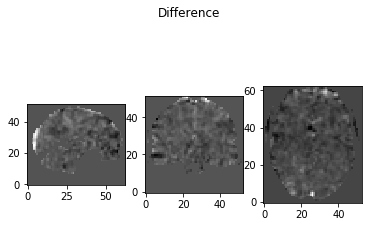

In [3]:
print(diffdata.shape)

slice_6 = data2[26, :, :]
slice_7 = data2[:, 31, :]
slice_8 = data2[:, :, 26]
show_slices([slice_6, slice_7, slice_8])
plt.suptitle("Difference")  # doctest: +SKIP
